<a href="https://colab.research.google.com/github/HenriqueWF/Serie_A_Campeonato_Brasileiro/blob/main/S%C3%A9rie_A_Campeonato_Brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise de Dados da Era dos Pontos Corridos da Série A do Campeonato Brasileiro

---

## Introdução

O Campeonato Brasileiro de Futebol, também conhecido como Brasileirão, é a principal competição de futebol do Brasil. Disputado anualmente por clubes de todo o país, o campeonato cativa milhões de torcedores, proporcionando momentos de intensa emoção, rivalidades acirradas e grandes espetáculos esportivos.

O Campeonato Brasileiro de Futebol é composto por diferentes séries. A principal delas é a Série A, também conhecida como Brasileirão Série A, que reúne os clubes de maior destaque e tradição do futebol brasileiro.


<center><img alt="Analisando Airbnb" width="50%" src="https://publisher-publish.s3.eu-central-1.amazonaws.com/pb-brasil247/swp/jtjeq9/media/20210924080952_15577685bb1360072c42e868e6fa602b5c2d2fd9e6e968d642648607b828b6c2.jpg"></center>

Desde 2003, a Série A é disputada em formato de pontos corridos, período conhecido como "Era dos Pontos Corridos". Nesse formato, os times se enfrentam em turno e returno, ao longo de uma temporada, para definir o campeão, os classificados para competições internacionais e os rebaixados para a Série B.

Desse modo, nesse *notebook*, serão analisados dados referentes ao Campeonato Brasileiro de 2003 à 2022, a fim de identificar quais insights podem ser extraídos sobre essa competição futebolísitca nacional.

 <center><img alt="Analisando Airbnb" width="50%" src="https://img.freepik.com/fotos-gratis/jogadores-de-futebol-em-acao-no-estadio-profissional_654080-1820.jpg?w=1380&t=st=1687534609~exp=1687535209~hmac=881c529f74745b2efedc31aa60cddeabcdfd389f23f36cd37dcccfc36169fba4"></center>

---
## Objetivo do Estudo
**Realizar uma análise exploratória dos dados dos datasets do Campeonato Brasileiro, de modo a obter insights sobre o cenário do futebol do país na Era dos Pontos Corridos. Serão exploradas variáveis como pontuação, número de vitórias, derrotas e empates, além da distribuição de gols e cartões.**

---

## Obtenção dos Dados e Importação de Bibliotecas
Todos os dados usados aqui foram obtidos a partir do [Kaggle](https://www.kaggle.com/).

Para esta análise exploratória inicial, serão utilizados três datasets disponibilizados no link abaixo:

* [Campeonato Brasileiro de futebol](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol)

Optou-se por não reunir os dados em uma só tabela, visto que os datasets sobre cartões e gols só possuem dados a partir de 2014, enquanto que o 'full' possui dados desde 2003.

Ademais, para facilitar a compreensão desta análise, foram ocultados alguns códigos em Python. Isso proporcionará uma visualização mais limpa e focada nos principais aspectos e conclusões do estudo.

Fique à vontade para expandí-los quando achar necessário!🙂

In [ ]:
# Instalação de Bibliotecas
!pip install wordcloud -q
!pip install bar_chart_race -q
!conda install -c conda-forge ffmpeg
!pip install ffmpeg-python

/bin/bash: conda: command not found


In [ ]:
# Importação dos pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import bar_chart_race as bcr

In [ ]:
# Importação dos arquivos csv e transformação para DataFrame
df_full = pd.read_csv("https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-full.csv")
df_cartoes = pd.read_csv("https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-cartoes.csv", )
df_gols = pd.read_csv("https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-gols.csv")

## Pré-Configuração
Abaixo foram realizadas algumas pré-configurações que serão utilizadas posteriormente na análise dos dados.

In [ ]:
#@title Configurações de Gráficos
# Configurações
# plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Configurar a fonte dos gráficos
plt.rcParams['font.family'] = 'sans-serif'

In [ ]:
#@title Definição de Cores
# Definições de cores -> todas estão numa escala de mais escura para mais clara
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

In [ ]:
#@title Configuração de Data e Colunas
# Alterar tipo da data
df_full['data'] = pd.to_datetime(df_full['data']);

# Renomear colunas
df_full = df_full.rename(columns={'ID': 'partida_id',
                                  'rodata': 'rodada'})

<ipython-input-71-c9d924fa3ced>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_full['data'] = pd.to_datetime(df_full['data']);


## **Análise dos Dados**
Divisão do estudo:

- **1. Análise de Pontos e Desempenho dos Clubes**

- **2. Análise de Gols**

- **3. Análise de Cartões**

## **1. Análise de Pontos e Desempenho dos Clubes**

Para essa análise, será utilizado o dataset denominado df_full. Nele há  informações abrangentes sobre a Primeira Divisão do Campeonato Brasileiro na Era dos Pontos Corridos, contemplando as temporadas de 2003 a 2022.

É composto por **8025 linhas**, cada uma representando um jogo disputado nesse período, e possui **20 colunas**. É válido ressaltar que as variáveis `perdedor`, `pontos_mandante`, `pontos_visitante` e `Ano` não estavam presentes no dataset original, mas foram incorporadas por meio do código abaixo, de modo a enriquecer a análise e fornecer informações adicionais relevantes.

In [ ]:
#@title Dataset df_full

# Acrescentar coluna ano
df_full['Ano'] = df_full['data'].dt.year

# Definir as partidas que são da temporada de 2020, visto que algumas ocorreram em 2021 por causa da pandemia
df_full.loc[(df_full['partida_id'].between(6886, 7265)), 'Ano'] = 2020
df_full.loc[df_full.partida_id == 7200]

# Código para acrescentar as variáveis 'vencedor', 'mandante' e 'visitante'
df_full['pontos_mandante'] = 0
df_full['pontos_visitante'] = 0
df_full['perdedor'] = ''

for i, coluna in df_full.iterrows():
    vencedor = coluna['vencedor']
    mandante = coluna['mandante']
    visitante = coluna['visitante']

    if vencedor == mandante:
        df_full.loc[i, 'pontos_mandante'] = 3  # Vitória do mandante
        df_full.loc[i, 'pontos_visitante'] = 0  # Derrota do visitante
        df_full.loc[i, 'perdedor'] = visitante  # Definir o perdedor como visitante
    elif vencedor == visitante:
        df_full.loc[i, 'pontos_mandante'] = 0  # Derrota do mandante
        df_full.loc[i, 'pontos_visitante'] = 3  # Vitória do visitante
        df_full.loc[i, 'perdedor'] = mandante  # Definir o perdedor como mandante
    else:
        df_full.loc[i, 'pontos_mandante'] = 1  # Empate
        df_full.loc[i, 'pontos_visitante'] = 1  # Empate
        df_full.loc[i, 'perdedor'] = '-'  # Definir o perdedor como empate

# Modificar nome de Barueri para Gremio Prudente
df_full['mandante'] = df_full['mandante'].replace('Barueri', 'Gremio Prudente')
df_full['visitante'] = df_full['visitante'].replace('Barueri', 'Gremio Prudente')
df_full['vencedor'] = df_full['vencedor'].replace('Barueri', 'Gremio Prudente')
df_full['perdedor'] = df_full['perdedor'].replace('Barueri', 'Gremio Prudente')

df_full

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,Ano,pontos_mandante,pontos_visitante,perdedor
0,1,1,2003-03-29,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ,2003,3,0,Vasco
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS,2003,3,0,Gremio
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,2003,1,1,-
3,4,1,2003-03-30,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA,2003,1,1,-
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP,2003,1,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,2022-11-13,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR,2022,3,0,Coritiba
8021,8022,38,2022-11-13,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ,2022,0,3,Bragantino
8022,8023,38,2022-11-13,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG,2022,0,3,Corinthians
8023,8024,38,2022-11-13,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP,2022,3,0,Palmeiras


##### **Dicionário das Variáveis**
 - `ID` - ID da partida;
 - `rodada` - Rodada que aconteceu a partida;
 - `data` - Data que ocorreu a partida;
 - `horário` -  Horário que ocorreu a partida;
 - `dia` - Dia da semana que ocorreu a partida;
 - `mandante` - Clube mandante;                     
 - `visitante` - Clube Visitante;
 - `formacao_mandante` - Formação do mandante;
 - `formacao_visitante` - Formação do visitante;
 - `tecnico_mandante` - Técnico do mandante;
 - `tecnico_visitante` - Técnico do visitante;
 - `vencedor` - Clube vencedor da partida. Quando tiver "-", é um empate
 - `perdedor` - Clube perdedor da partida. Quando tiver "-", é um empate
 - `arena` - Arena que ocorreu a partida    ;                  
 - `mandante_Placar` - Gols que o clube mandante fez na partida;                     
 - `visitante_Placar` - Gols que o clube visitante fez na partida;                      
 - `mandante_Estado` - Estado do clube mandatorio;                      
 - `visitante_Estado` - Estado do clube visitante;                      
 - `estado_vencedor` - Estado do clube vencedor. Quando tiver "-", é um empate;
 - `pontos_mandante` - Pontuação do mandante na partida;
 - `pontos_visitante` - Pontuação do visitante na partida;
 - `Ano` - Ano em que ocorreu a partida.

##### **Tipos das variáveis**

A conferência dos tipos das variáveis em um dataset é fundamental para garantir a correta análise dos dados. Nesse sentido, é importante observar se os tipos estão coerentes com as representações das variáveis.

In [ ]:
df_full.dtypes

partida_id                     int64
rodada                         int64
data                  datetime64[ns]
hora                          object
mandante                      object
visitante                     object
formacao_mandante             object
formacao_visitante            object
tecnico_mandante              object
tecnico_visitante             object
vencedor                      object
arena                         object
mandante_Placar                int64
visitante_Placar               int64
mandante_Estado               object
visitante_Estado              object
Ano                            int64
pontos_mandante                int64
pontos_visitante               int64
perdedor                      object
dtype: object

##### **Porcentagem de valores ausentes no *dataset***
Pode-se notar que algumas variáveis apresentam valores ausentes no *dataset*:
 - As colunas que tratam sobre a **formação de escalação dos times** apresentam pouco mais de 60% de valores faltantes;
 - As variáveis relacionadas aos **técnicos** possuem cerca de 57% dos seus valores nulos.

As demais variáveis não possuem valores ausentes.

Desse modo, foi optado por **não utilizar essas variáveis** para analisar os dados, devido à elevada taxa de valores ausentes. Assim, o estudo foi direcionado para analisar as outras variáveis que possuem uma disponibilidade mais completa, permitindo uma investigação mais precisa e abrangente dos dados.

In [ ]:
(df_full.isnull().sum() / df_full.shape[0]).sort_values(ascending=False)

formacao_mandante     0.619813
formacao_visitante    0.619813
tecnico_mandante      0.574455
tecnico_visitante     0.574455
partida_id            0.000000
mandante_Placar       0.000000
pontos_visitante      0.000000
pontos_mandante       0.000000
Ano                   0.000000
visitante_Estado      0.000000
mandante_Estado       0.000000
visitante_Placar      0.000000
vencedor              0.000000
arena                 0.000000
rodada                0.000000
visitante             0.000000
mandante              0.000000
hora                  0.000000
data                  0.000000
perdedor              0.000000
dtype: float64

### **1.1 Análise de Pontos**

Durante a Era dos Pontos Corridos, **44 equipes disputaram a Séria A** do Brasileirão. No entanto, apenas **quatro times participaram de todas as edições** entre 2003 e 2022:
 - Flamengo;
 - Fluminense;
 - Santos;
 - São Paulo;

Além disso, desde 2003, somente **oito clubes** se consagraram campeões da Primeira Divisão do Campeonato Brasileiro:
 - Corinthians - 4 títulos (2005, 2011, 2015 e 2017)
 - Palmeiras - 3 títulos (2016, 2018 e 2022)
 - Cruzeiro - 3 títulos (2003, 2013 e 2014)
 - São Paulo - 3 títulos (2006, 2007 e 2008)
 - Flamengo - 3 títulos (2009, 2019 e 2020)
 - Fluminense - 2 títulos (2010 e 2012)
 - Santos - 1 título (2004)
 - Atlético-MG - 1 título (2021)

In [ ]:
#@title WordCloud
# # Filtrar os dados da variável 'mandante'
# mandante_description = df_full['mandante']

# # Lista de stopwords
# stopwords = set(STOPWORDS)
# stopwords.update(["RJ", 'santo'])

# # Gerar a wordcloud
# wordcloud = WordCloud(stopwords=stopwords,
#                       background_color="black",
#                       width=1600,
#                       height=800,
#                       max_font_size=200).generate(' '.join(mandante_description))

# # Mostrar a imagem final
# fig, ax = plt.subplots(figsize=(12,6))
# ax.imshow(wordcloud, interpolation='bilinear')
# ax.set_axis_off()

# plt.imshow(wordcloud)
# wordcloud.to_file("times_brasileirao_wordcloud.png",);

Abaixo há uma "WordCloud" de todos os times que participaram na Série A do Campeonato Brasileiro. Essa "nuvem de palavras" é uma representação visual em que o tamanho das palavras é proporcional à sua frequência de ocorrência.
<center><img alt="Times Brasileirão" width="50%" src="https://drive.google.com/uc?export=view&id=1Mm1ERsY8Ev-lf3KTPfuSg48j_lGrsTpb"></center>

Na Era dos Pontos Corridos, o **São Paulo é o time com o maior somatório de pontos**, seguido por Flamengo e Santos. Nota-se que, apesar do Fluminense ter participado de todas as edições entre 2003 e 2022, o time ficou em sexto lugar no ranking de pontuação, atrás de Internacional e Corinthians.

Além disso, entre os 10 primeiros clubes mais pontuadores, apenas os times do Sul (Athlético-PR, Grêmio e Internacional) não foram campeões do Brasileirão Série A durante a Era dos Pontos Corridos. Destaque vai para o Corinthians, que possui 4 campeonatos.

Ademais, é válido ressaltar que **só a partir de 2006 que há 20 clubes disputando a Série A do Brasileirão.** Em 2003 e 2004, 24 clubes participaram do Campeonato Brasileiro, enquanto que em 2005 foi reduzido para 22 times.

Abaixo pode-se conferir a '**Tabela 1 - Somatório da Pontuação dos Clubes na Séria A do Brasileirão na Era dos Pontos Corridos**', a qual exibe a soma dos pontos de todos os clubes que participaram da Série A entre 2003 e 2022.

In [ ]:
#@title Tabela 1 - Somatório da Pontuação dos Clubes na Séria A do Brasileirão na Era dos Pontos Corridos
# Agrupar os clubes como mandantes e somar os pontos de mandante
pontos_mandante = df_full.groupby('mandante')['pontos_mandante'].sum().reset_index()

# Agrupar os clubes como visitantes e somar os pontos de visitante
pontos_visitante = df_full.groupby('visitante')['pontos_visitante'].sum().reset_index()

# Juntar as tabelas
total_pontos = pontos_mandante.merge(pontos_visitante, left_on='mandante', right_on='visitante', how='outer')

# Criar coluna para totalizar os pontos
total_pontos['total_pontos'] = total_pontos['pontos_mandante'] + total_pontos['pontos_visitante']

# Ordenar de forma descendente de pontuação total
total_pontos = total_pontos[['mandante', 'total_pontos']].sort_values(by=['total_pontos'], ascending=False).reset_index(drop=True)

# Resetar o índice para começar em 1
total_pontos = total_pontos.reset_index(drop=True)
total_pontos.index += 1

# Renomear as colunas
total_pontos.columns = ['Clube', 'Pontuação Total']

# Aplicar estilo de gradiente de cores
total_pontos.style.background_gradient(cmap='Greens')


,Clube,Pontuação Total
1,Sao Paulo,1271
2,Flamengo,1217
3,Santos,1194
4,Internacional,1164
5,Corinthians,1157
6,Fluminense,1123
7,Atletico-MG,1114
8,Palmeiras,1107
9,Gremio,1065
10,Athletico-PR,1060


### **1.2 Análise de Vitórias, Derrotas e Empates dos Clubes na Série A**

Foi estruturada a '**Tabela 2.2 - Dados Relativos de Vitórias, Derrotas e Empates dos Clubes do Brasileirão Série A**' com os dados relativos das porcentagens de vitórias, derrotas e empates de todos os clubes que participaram da Série A do Brasileirão desde 2003. Essa tabela está ordenada pela quantidade total de jogos que cada clube disputou.

**A análise foi realizada levando em consideração a quantidade de participações de cada clube ao longo das temporadas.** Essa abordagem permite uma visão comparativa das performances dos clubes, destacando suas respectivas proporções de vitórias, derrotas e empates em relação ao total de jogos disputados.

##### **Vitórias**
 - São Paulo é o time que possui o melhor aproveitamento de vitórias nas temporadas que atuou na Série A, seguido por Palmeiras e Cruzeiro.
 - **Apenas 12 clubes apresentam uma porcentagem de vitórias superior à de derrotas.** Essas equipes, que ocupam as 11 primeiras posições da lista, são acompanhadas pelo Bragantino, que registra 33,33% de vitórias, 32,46% de derrotas e 34,21% de empates.

##### **Derrotas**
 - América-RN destaca-se como o clube com pior aproveitamento, contendo 76% de derrotas em sua única participação da Série A, em 2007.
 - Com exceção do Bragantino, **todos os times abaixo do Cruzeiro apresentam um número maior de derrotas do que de vitórias**.

##### **Empates**
 - Cuiabá é a equipe com maior número de empates nos jogos que atuou na Série A, com 36,84% de empates. Essa porcentagem equivale ao número de derrotas desse clube.

In [ ]:
#@title Tabela 2.1 - Dados Absolutos de Vitórias, Derrotas e Empates dos Clubes do Brasileirão Série A
# Contagem de vitórias por time
contagem_vitorias = df_full[df_full['vencedor'] != '-']['vencedor'].value_counts().sort_values(ascending=False)

# Contagem de derrotas por time
contagem_derrotas = df_full[df_full['perdedor'] != '-']['perdedor'].value_counts().sort_values(ascending=False)

# Filtrar apenas as linhas em que ocorreram empates
empates = df_full[df_full['vencedor'] == '-']
# Contar a quantidade de empates por time (considerando tanto mandante quanto visitante)
contagem_empates = pd.concat([empates['mandante'].value_counts(), empates['visitante'].value_counts()], axis=1).fillna(0).sum(axis=1)

# Criar a tabela combinando as contagens de vitórias, derrotas e empates
tabela_aproveitamento = pd.concat([contagem_vitorias, contagem_derrotas, contagem_empates], axis=1, keys=['Vitórias', 'Derrotas', 'Empates'])

# Preencher valores ausentes com zero
tabela_aproveitamento = tabela_aproveitamento.fillna(0)

# Ordenar os times pelo número total de partidas
tabela_aproveitamento['Total Jogos'] = tabela_aproveitamento.sum(axis=1)
tabela_aproveitamento = tabela_aproveitamento.sort_values(by='Total Jogos', ascending=False).reset_index()

# Resetar o índice para começar em 1
tabela_aproveitamento = tabela_aproveitamento.reset_index(drop=True)
tabela_aproveitamento.index += 1

# Renomear as colunas
tabela_aproveitamento.columns = ['Clube', 'Vitórias', 'Derrotas', 'Empates', 'Total Jogos']

# Exibir a tabela
# display(tabela_aproveitamento)


In [ ]:
#@title Tabela 2.2 - Dados Relativos de Vitórias, Derrotas e Empates dos Clubes do Brasileirão Série A
# Fazendo cópia da tabela aproveitamento para aplicar porcentagem apenas na tabela porcentagem_aproveitamento
porcentagem_aproveitamento = tabela_aproveitamento.copy()
for col in list(porcentagem_aproveitamento.columns)[1:4]:
    porcentagem_aproveitamento[col] = porcentagem_aproveitamento[col] / porcentagem_aproveitamento['Total Jogos']

# Aplicar formatação e estilo
porcentagem_aproveitamento.style.format({"Vitórias": "{:.2%}",
                                         "Derrotas": "{:.2%}",
                                         "Empates": "{:.2%}"})\
                          .background_gradient(cmap='Greens')


,Clube,Vitórias,Derrotas,Empates,Total Jogos
1,Sao Paulo,45.00%,27.05%,27.95%,780
2,Flamengo,42.95%,29.87%,27.18%,780
3,Santos,42.18%,31.28%,26.54%,780
4,Fluminense,39.23%,34.49%,26.28%,780
5,Internacional,43.67%,30.46%,25.88%,742
6,Corinthians,42.32%,28.71%,28.98%,742
7,Athletico-PR,39.76%,36.66%,23.58%,742
8,Atletico-MG,41.57%,32.79%,25.64%,741
9,Gremio,42.14%,32.14%,25.71%,700
10,Palmeiras,44.40%,29.74%,25.86%,696


### **1.3 Análise de Jogos de Mandantes e Visitantes**

A análise dos resultados de times como mandantes e visitantes é uma abordagem fundamental para compreender o desempenho das equipes em diferentes contextos de jogo. Essa análise permite avaliar a força do time em seu próprio estádio, bem como sua capacidade de adaptação e desempenho em ambientes adversos.

Em geral, o fator de jogar em casa é considerado favorável em relação a disputar uma partida em outro estádio. Existem diversos elementos que influenciam essa vantagem para o time mandante, como o apoio da torcida, a familiaridade com o campo e a ausência de desgaste com viagens.

**Desse modo, essa seção tem como objetivo verificar se a suposta supremacia dos times mandantes, amplamente difundida como senso comum, é realmente refletida nos dados do Campeonato Brasileiro.**

#### **1.3.1 Análise de Pontos dos Clubes como Mandante e Visitante**
Abaixo há a '**Tabela 3 - Somatório de Pontos como Mandante e Visitante dos Clubes na Séria A do Brasileirão na Era dos Pontos Corridos**', a qual expõe em ordem decrescente dos clubes com mais pontos no total para os times com menor pontuação em geral.

Pode-se notar que:
 - **Todos os clubes possuem maior pontuação como mandante do que como visitante**;
 - São Paulo é o time com maior pontuação como clube visitante. No entanto, empata com o Santos como as equipes com maiores pontuações como mandantes;

In [ ]:
#@title Tabela 3 - Somatório de Pontos como Mandante e Visitante dos Clubes na Séria A do Brasileirão na Era dos Pontos Corridos
# Agrupar os clubes como mandantes e somar os pontos de mandante
pontos_mandante = df_full.groupby('mandante')['pontos_mandante'].sum().reset_index()

# Agrupar os clubes como visitantes e somar os pontos de visitante
pontos_visitante = df_full.groupby('visitante')['pontos_visitante'].sum().reset_index()

# Juntar as tabelas
total_pontos = pontos_mandante.merge(pontos_visitante, left_on='mandante', right_on='visitante', how='outer')

# Criar coluna para totalizar os pontos
total_pontos['total_pontos'] = total_pontos['pontos_mandante'] + total_pontos['pontos_visitante']

# Ordenar de forma descendente de pontuação total
total_pontos = total_pontos[['mandante', 'pontos_mandante', 'pontos_visitante', 'total_pontos']].sort_values(by=['total_pontos'], ascending=False).reset_index(drop=True)

# Resetar o índice para começar em 1
total_pontos = total_pontos.reset_index(drop=True)
total_pontos.index += 1

# Renomear as colunas
total_pontos.columns = ['Clube', 'Pontuação-Mandante', 'Pontuação-Visitante', 'Pontuação Total']

# Aplicar estilo de gradiente de cores
total_pontos.style.background_gradient(cmap='Greens')


,Clube,Pontuação-Mandante,Pontuação-Visitante,Pontuação Total
1,Sao Paulo,771,500,1271
2,Flamengo,741,476,1217
3,Santos,771,423,1194
4,Internacional,748,416,1164
5,Corinthians,714,443,1157
6,Fluminense,683,440,1123
7,Atletico-MG,701,413,1114
8,Palmeiras,671,436,1107
9,Gremio,695,370,1065
10,Athletico-PR,727,333,1060


#### **1.3.2 Tabela Comparativa de Vitórias, Empates e Derrotas de Mandantes e Visitantes**
Foi elaborada uma tabela que contém os dados relativos às porcentagens de vitórias, derrotas e empates como mandante e visitante para todos os clubes que participaram da Série A do Brasileirão desde 2003. **Essa tabela é organizada em porcentagem relacionada à soma de jogos de cada clube ao longo das temporadas e ordenada com base na quantidade de jogos disputados por cada clube.**

A análise foi realizada levando em consideração a quantidade de participações de cada clube ao longo das temporadas. Essa abordagem permite uma comparação das performances dos clubes, destacando suas respectivas proporções de vitórias, derrotas e empates em relação ao total de jogos disputados.

Caso queira realizar uma análise mais aprofundada de cada time, consulte a '**Tabela 3. Dados Relativos do Desempenho dos Clubes na Série A do Brasileirão na Era dos Pontos Corridos**'. Caso contrário, pode-se verificar os gráficos após a Tabela 3, os quais foram divididos entre os 10 times com mais vitórias, derrotas e empates como mandante e como visitante.

In [ ]:
#@title Configuração Tabela de Resultados
# VITÓRIAS
# Contagem de vitórias como mandante
vitorias_clube_mandante = df_full[df_full['vencedor'] == df_full['mandante']].groupby('mandante').size().reset_index(name='Vitórias Mandante')
# Contagem de vitórias como visitante
vitorias_clube_visitante = df_full[df_full['vencedor'] == df_full['visitante']].groupby('visitante').size().reset_index(name='Vitórias Visitante')

# DERROTAS
# Contagem de derrotas como mandante
derrotas_clube_mandante = df_full[df_full['perdedor'] == df_full['mandante']].groupby('mandante').size().reset_index(name='Derrotas Mandante')
# Contagem de derrotas como visitante
derrotas_clube_visitante = df_full[df_full['perdedor'] == df_full['visitante']].groupby('visitante').size().reset_index(name='Derrotas Visitante')

# EMPATES
# Contagem de empates como mandante
empates_clube_mandante = df_full[df_full['vencedor'] == '-'].groupby('mandante').size().reset_index(name='Empates Mandante')
# Contagem de empates como visitante
empates_clube_visitante = df_full[df_full['perdedor'] == '-'].groupby('visitante').size().reset_index(name='Empates Visitante')

# Juntando as tabelas de vitórias, derrotas e empates
tabela_clubes_resultados = vitorias_clube_mandante.merge(vitorias_clube_visitante, left_on='mandante', right_on='visitante', how='outer').drop('visitante', axis=1)
tabela_clubes_resultados = tabela_clubes_resultados.merge(derrotas_clube_mandante, left_on='mandante', right_on='mandante', how='outer')
tabela_clubes_resultados = tabela_clubes_resultados.merge(derrotas_clube_visitante, left_on='mandante', right_on='visitante', how='outer').drop('visitante', axis=1)
tabela_clubes_resultados = tabela_clubes_resultados.merge(empates_clube_mandante, left_on='mandante', right_on='mandante', how='outer')
tabela_clubes_resultados = tabela_clubes_resultados.merge(empates_clube_visitante, left_on='mandante', right_on='visitante', how='outer').drop('visitante', axis=1)

# Renomeando as colunas
tabela_clubes_resultados.rename(columns={'mandante': 'Clube'}, inplace=True)

# Preenchendo valores NaN com 0
tabela_clubes_resultados.fillna(0, inplace=True)

# Convertendo colunas para tipo inteiro
tabela_clubes_resultados['Vitórias Visitante'] = tabela_clubes_resultados['Vitórias Visitante'].astype(int)

# Somando as colunas para obter o total de jogos
tabela_clubes_resultados['Total Jogos'] = tabela_clubes_resultados['Vitórias Mandante'] + tabela_clubes_resultados['Vitórias Visitante'] + tabela_clubes_resultados['Derrotas Mandante'] + tabela_clubes_resultados['Derrotas Visitante'] + tabela_clubes_resultados['Empates Mandante'] + tabela_clubes_resultados['Empates Visitante']
#tabela_clubes_resultados.sort_values(by='Total Jogos', ascending=False).reset_index().drop('index', axis=1)


In [ ]:
#@title Tabela 3. Dados Relativos do Desempenho dos Clubes na Série A do Brasileirão na Era dos Pontos Corridos
# Cópia da tabela total_jogos para aplicar porcentagem
porcentagem_clubes_resultados = tabela_clubes_resultados.copy()
for col in list(porcentagem_clubes_resultados.columns)[1:7]:
    porcentagem_clubes_resultados[col] = porcentagem_clubes_resultados[col] / porcentagem_clubes_resultados['Total Jogos']

porcentagem_clubes_resultados = porcentagem_clubes_resultados.sort_values(by='Total Jogos', ascending=False).reset_index(drop=True)

# Aplicar formatação e estilo
porcentagem_clubes_resultados_style = porcentagem_clubes_resultados.style.format({'Vitórias Mandante': "{:.2%}",
                                                                         'Vitórias Visitante': "{:.2%}",
                                                                         'Derrotas Mandante': "{:.2%}",
                                                                         'Derrotas Visitante': "{:.2%}",
                                                                         'Empates Mandante': "{:.2%}",
                                                                         'Empates Visitante': "{:.2%}"})\
                                                          .background_gradient(cmap='Greens')\
                                                          .hide_index();

# Exibir a tabela final com a formatação aplicada
display(porcentagem_clubes_resultados_style)

<ipython-input-81-52b0d6246a91>:17: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index();


Clube,Vitórias Mandante,Vitórias Visitante,Derrotas Mandante,Derrotas Visitante,Empates Mandante,Empates Visitante,Total Jogos
Santos,28.72%,13.46%,8.59%,22.69%,12.69%,13.85%,780
Flamengo,27.44%,15.51%,9.74%,20.13%,12.69%,14.49%,780
Sao Paulo,28.33%,16.67%,7.82%,19.23%,13.85%,14.10%,780
Fluminense,24.62%,14.62%,11.67%,22.82%,13.72%,12.56%,780
Internacional,29.65%,14.02%,8.49%,21.97%,11.86%,14.02%,742
Athletico-PR,28.44%,11.32%,8.89%,27.76%,12.67%,10.92%,742
Corinthians,27.63%,14.69%,9.03%,19.68%,13.34%,15.63%,742
Atletico-MG,27.94%,13.63%,11.34%,21.46%,10.80%,14.84%,741
Gremio,29.14%,13.00%,9.00%,23.14%,11.86%,13.86%,700
Palmeiras,28.45%,15.95%,10.49%,19.25%,11.06%,14.80%,696


#### **1.3.3 Análise de Vitórias como Mandante e Visitante**
Nos gráficos abaixo, foram selecionados os dez clubes com maior quantidade de vitórias, tanto jogando em casa como fora, em relação ao total de partidas disputadas no Brasileirão.

Em destaque estão o Athletico-PR e o Fluminense, visto que são as duas únicas equipes que não estão presentes nos dois gráficos. Para isso, foi definido um conjunto de dados contendo os clubes que aparecem tanto no primeiro gráfico quanto no segundo.

##### **Análise Geral**
 - Entre os 10 primeiros clubes mais vitoriosos como mandante ou como visitante, apenas os times do Sul (Athlético-PR, Grêmio e Internacional) não foram campeões do Brasileirão Série A durante a Era dos Pontos Corridos;
 - Os clubes com melhores resultados, ou seja, aqueles que possuem maior número de vitórias, estão entre os primeiros colocados tanto na análise de mandantes quanto na de visitantes, com exceção de Athletico-PR e Flumninense;
 - O desempenho como mandante e visitante exerce um papel importante no sucesso dos clubes. Os times que conseguem obter vitórias consistentes em ambos os cenários têm mais chances de alcançar um bom desempenho geral no campeonato.

##### **Análise dos Mandantes**
 - Observa-se que a **porcentagem de vitórias dos clubes como mandantes é maior do que como visitantes**. Isso indica que o fator de jogar em casa pode influenciar positivamente o desempenho das equipes;
 - Cerca de **90% dos clubes** possuem **mais vitórias do que derrotas** em jogos no seu estádio (verificar **Tabela 3**);
 - A dupla Grenal, isto é, Grêmio e Internacional, são os clubes com melhores resultados como mandantes;
 - Em relação aos dez clubes com maiores pontuações, apenas Fluminense não está entre os clubes com mais vitórias como mandante.

##### **Análise dos Visitantes**
  - São Paulo lidera os clubes com melhor resultado jogando fora de casa;
  - Apesar de não estar entre os clubes com mais vitórias como mandante, o Fluminense se encontra nas equipes com mais vitórias como time visitante;
  - Athletico-PR, clube que está entre os 10 colocados com melhor desempenho de mandante, não possui um bom aproveitamento em jogos fora de casa em relação aos outros clubes que estão nas primeiras posições. Desse modo, não aparece no gráfico dos 10 times com mais vitórias como visitante.


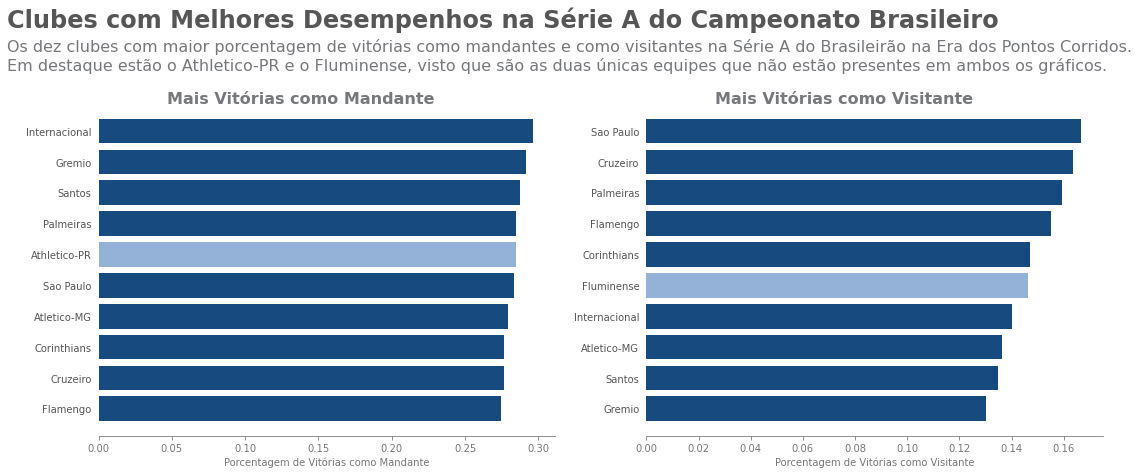

In [ ]:
#@title

# Análise de Vitórias de Mandantes e Visitantes
# Definir os 10 clubes com mais vitórias como mandante e visitante
mandante_vitorias_top10 = porcentagem_clubes_resultados.nlargest(10, 'Vitórias Mandante').sort_values(by='Vitórias Mandante', ascending=True)
visitante_vitorias_top10 = porcentagem_clubes_resultados.nlargest(10, 'Vitórias Visitante').sort_values(by='Vitórias Visitante', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=72)

# Verificar clubes em ambos os gráficos
clubes_destaque = set(mandante_vitorias_top10['Clube']).intersection(set(visitante_vitorias_top10['Clube']))

# Plotar gráfico para mandante
for clube in mandante_vitorias_top10['Clube']:
    if clube in clubes_destaque:
        ax1.barh(clube, mandante_vitorias_top10[mandante_vitorias_top10['Clube'] == clube]['Vitórias Mandante'], color=AZUL1)
    else:
        ax1.barh(clube, mandante_vitorias_top10[mandante_vitorias_top10['Clube'] == clube]['Vitórias Mandante'], color=AZUL3)

# Plotar gráfico para visitante
for clube in visitante_vitorias_top10['Clube']:
    if clube in clubes_destaque:
        ax2.barh(clube, visitante_vitorias_top10[visitante_vitorias_top10['Clube'] == clube]['Vitórias Visitante'], color=AZUL1)
    else:
        ax2.barh(clube, visitante_vitorias_top10[visitante_vitorias_top10['Clube'] == clube]['Vitórias Visitante'], color=AZUL3)

# Definir eixo x
ax1.set_xlabel('Porcentagem de Vitórias como Mandante')
ax2.set_xlabel('Porcentagem de Vitórias como Visitante')

# Configurar os rótulos e título do gráfico
ax1.set_xlabel('Porcentagem de Vitórias como Mandante', color=CINZA5)
ax2.set_xlabel('Porcentagem de Vitórias como Visitante', color=CINZA5)

# Definir cor cinza dos valores do eixo y
ax1.tick_params(axis='y', colors=CINZA3, labelsize=10)
ax2.tick_params(axis='y', colors=CINZA3, labelsize=10)

# Definir cores dos eixos
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color(CINZA5)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax1.tick_params(axis='x', colors=CINZA5)
ax2.tick_params(axis='x', colors=CINZA5)

# Remover yticks do eixo y
ax1.tick_params(left=False)
ax2.tick_params(left=False)

# Título
ax1.text(-0.2, 1.23,'Clubes com Melhores Desempenhos na Série A do Campeonato Brasileiro',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform = ax1.transAxes)

# Subtítulo
ax1.text(-0.2, 1.1, 'Os dez clubes com maior porcentagem de vitórias como mandantes '
                      'e como visitantes na Série A do Brasileirão na Era dos '
                      'Pontos Corridos.\nEm destaque '
                      'estão o Athletico-PR e o Fluminense, visto que são as duas '
                      'únicas equipes que não estão presentes em ambos os gráficos. ',
        fontsize=16,
        color=CINZA5,
        transform = ax1.transAxes)

# Título do Primeiro Gráfico
ax1.text(0.15, 1, 'Mais Vitórias como Mandante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax1.transAxes)

# Título do Segundo Gráfico
ax2.text(0.15, 1, 'Mais Vitórias como Visitante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax2.transAxes)

# Exibir o gráfico
plt.show()



#### **1.3.4 Análise de Derrotas como Mandante e Visitante**
Nos gráficos abaixo, foram selecionados os 10 clubes que registraram o maior número de derrotas tanto em partidas realizadas em casa quanto fora.

Estão destacados os clubes que possuem o maior registro percentual de derrotas tanto como mandante quanto como visitante. Para isso, foi criado um conjunto de dados que contém os clubes presentes tanto no primeiro gráfico quanto no segundo.

##### **Análise Geral:**
 - América-RN, clube que participou da Série A uma única vez, em 2007, é a equipe com mais derrotas tanto fora quanto em casa, em relação ao percentual de partidas jogadas. O time só perde como pior campanha na Era dos Pontos Corridos para a Chapecoense, em que, em 2021, fez 15 pontos, enquanto que o América-RN fez 17 pontos.
 - Nenhum dos clubes abaixo no gráfico estão ná Série A do Brasileirão atualmente.

##### **Análise dos Mandantes:**
- Apenas 5 clubes possuem mais derrotas do que vitórias como mandante (verificar **Tabela 3**, após análise de empates):
 - Atletico-GO
 - Santa Cruz
 - Brasiliense
 - CSA
 - America-RN
- Somente dois clubes possuem a mesma quantidade de vitórias e derrotas como mandante:
 - Avai
 - Joinville

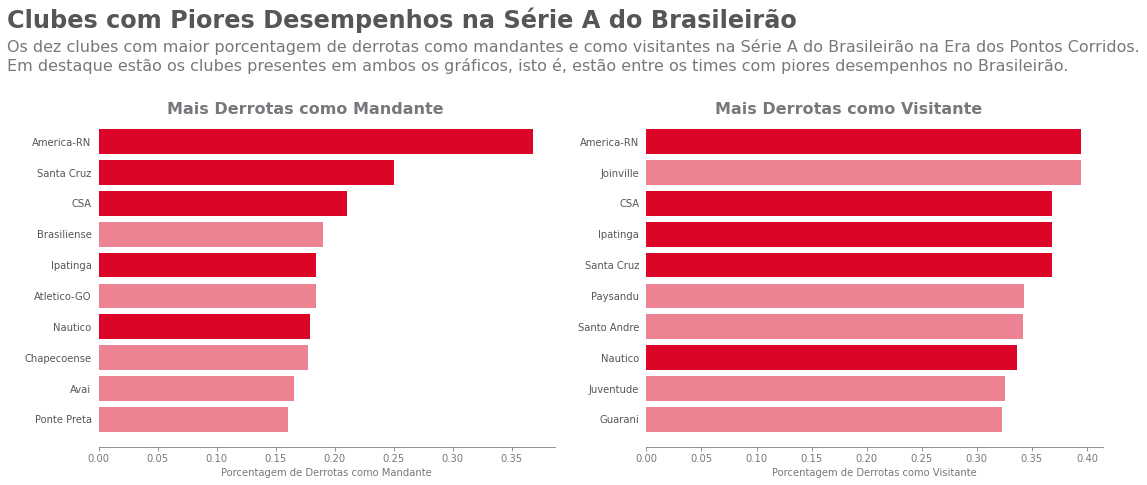

In [ ]:
#@title

# Análise de Derrotas de Mandantes e Visitantes
mandante_derrotas_top10 = porcentagem_clubes_resultados.nlargest(10, 'Derrotas Mandante').sort_values(by='Derrotas Mandante', ascending=True)
visitante_derrotas_top10 = porcentagem_clubes_resultados.nlargest(10, 'Derrotas Visitante').sort_values(by='Derrotas Visitante', ascending=True)

# Plotar Gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=72)

# Verificar clubes em ambos os gráficos
clubes_destaque = set(mandante_derrotas_top10['Clube']).intersection(set(visitante_derrotas_top10['Clube']))

# Plotar gráfico para mandante
for clube in mandante_derrotas_top10['Clube']:
    if clube in clubes_destaque:
        ax1.barh(clube, mandante_derrotas_top10[mandante_derrotas_top10['Clube'] == clube]['Derrotas Mandante'], color=VERMELHO1)
    else:
        ax1.barh(clube, mandante_derrotas_top10[mandante_derrotas_top10['Clube'] == clube]['Derrotas Mandante'], color=VERMELHO3)

# Plotar gráfico para visitante
for clube in visitante_derrotas_top10['Clube']:
    if clube in clubes_destaque:
        ax2.barh(clube, visitante_derrotas_top10[visitante_derrotas_top10['Clube'] == clube]['Derrotas Visitante'], color=VERMELHO1)
    else:
        ax2.barh(clube, visitante_derrotas_top10[visitante_derrotas_top10['Clube'] == clube]['Derrotas Visitante'], color=VERMELHO3)

# Definir eixo x
ax1.set_xlabel('Porcentagem de Derrotas como Mandante')
ax2.set_xlabel('Porcentagem de Derrotas como Visitante')

# Definir cor cinza dos valores do eixo y
ax1.tick_params(axis='y', colors=CINZA3, labelsize=10)
ax2.tick_params(axis='y', colors=CINZA3, labelsize=10)

# Configurar os rótulos e título do gráfico
ax1.set_xlabel('Porcentagem de Derrotas como Mandante', color=CINZA5)
ax2.set_xlabel('Porcentagem de Derrotas como Visitante', color=CINZA5)

# Definir cores dos eixos
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color(CINZA5)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax1.tick_params(axis='x', colors=CINZA5)
ax2.tick_params(axis='x', colors=CINZA5)

# Remover yticks do eixo y
ax1.tick_params(left=False)
ax2.tick_params(left=False)

# Título
ax1.text(-0.2, 1.26,'Clubes com Piores Desempenhos na Série A do Brasileirão',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform = ax1.transAxes)

# Subtítulo
ax1.text(-0.2, 1.13, 'Os dez clubes com maior porcentagem de derrotas como mandantes '
                      'e como visitantes na Série A do Brasileirão na Era dos '
                      'Pontos Corridos.\nEm destaque '
                      'estão os clubes presentes em ambos os gráficos, isto é, '
                      'estão entre os times com piores desempenhos no Brasileirão.',
        fontsize=16,
        color=CINZA5,
        transform = ax1.transAxes)

# Título do Primeiro Gráfico
ax1.text(0.15, 1, 'Mais Derrotas como Mandante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax1.transAxes)

# Título do Segundo Gráfico
ax2.text(0.15, 1, 'Mais Derrotas como Visitante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax2.transAxes)
# Exibir o gráfico
plt.show()


#### **1.3.5 Análise de Empates como Mandante e Visitante**
A seguir, foram selecionados os 10 clubes com maior registro de empates como mandante e como visitante.
Estão destacados os clubes que apresentam a maior porcentagem de empates tanto em jogos em casa quanto fora.

##### **Análise Geral:**
 - 4 equipes estão nos gráficos de maior porcentagem de empates como mandante e visitante:
  - Cuiabá
  - Ceará
  - Bragantino
  - Grêmio Prudente

##### **Análise dos Visitantes:**
 - Atlético-MG, Corinthians, Flamengo e Palmeiras são clubes que estão entre as equipes com mais empates como visitantes e também estão nas primeiras colocações dos times com maior porcentagem de vitórias em seus jogos disputados na Série A. Isso revela a eficiência desses clubes no campeonato brasileiro.




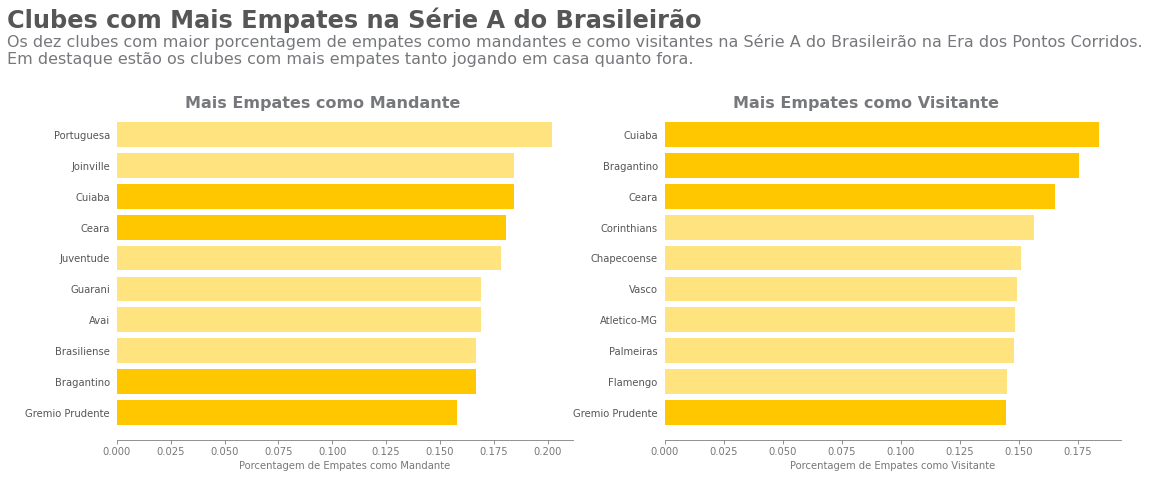

In [ ]:
#@title

# Análise de Empates
mandante_empates_top10 = porcentagem_clubes_resultados.nlargest(10, 'Empates Mandante').sort_values(by='Empates Mandante', ascending=True)
visitante_empates_top10 = porcentagem_clubes_resultados.nlargest(10, 'Empates Visitante').sort_values(by='Empates Visitante', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=72)

# Verificar clubes em ambos os gráficos
clubes_destaque = set(mandante_empates_top10['Clube']).intersection(set(visitante_empates_top10['Clube']))

# Plotar gráfico para mandante
for clube in mandante_empates_top10['Clube']:
    if clube in clubes_destaque:
        ax1.barh(clube, mandante_empates_top10[mandante_empates_top10['Clube'] == clube]['Empates Mandante'], color=AMARELO1)
    else:
        ax1.barh(clube, mandante_empates_top10[mandante_empates_top10['Clube'] == clube]['Empates Mandante'], color=AMARELO4)

# Plotar gráfico para visitante
for clube in visitante_empates_top10['Clube']:
    if clube in clubes_destaque:
        ax2.barh(clube, visitante_empates_top10[visitante_empates_top10['Clube'] == clube]['Empates Visitante'], color=AMARELO1)
    else:
        ax2.barh(clube, visitante_empates_top10[visitante_empates_top10['Clube'] == clube]['Empates Visitante'], color=AMARELO4)

# Definir eixo x
ax1.set_xlabel('Porcentagem de Empates como Mandante')
ax2.set_xlabel('Porcentagem de Empates como Visitante')

# Configurar os rótulos e título do gráfico
ax1.set_xlabel('Porcentagem de Empates como Mandante', color=CINZA5)
ax2.set_xlabel('Porcentagem de Empates como Visitante', color=CINZA5)

# Definir cores dos eixos
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color(CINZA5)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax1.tick_params(axis='x', colors=CINZA5)
ax2.tick_params(axis='x', colors=CINZA5)

# Definir cor cinza dos valores do eixo y
ax1.tick_params(axis='y', colors=CINZA3, labelsize=10)
ax2.tick_params(axis='y', colors=CINZA3, labelsize=10)

# Remover yticks do eixo y
ax1.tick_params(left=False)
ax2.tick_params(left=False)

# Título
ax1.text(-0.24, 1.24,'Clubes com Mais Empates na Série A do Brasileirão',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform = ax1.transAxes)

# Subtítulo
ax1.text(-0.24, 1.13, 'Os dez clubes com maior porcentagem de empates como mandantes '
                      'e como visitantes na Série A do Brasileirão na Era dos '
                      'Pontos Corridos.\nEm destaque '
                      'estão os clubes com mais empates tanto jogando em casa quanto fora.',
        fontsize=16,
        color=CINZA5,
        transform = ax1.transAxes)

# Título do Primeiro Gráfico
ax1.text(0.15, 1, 'Mais Empates como Mandante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax1.transAxes)

# Título do Segundo Gráfico
ax2.text(0.15, 1, 'Mais Empates como Visitante',
        fontsize=16,
        color=CINZA5,
        fontweight='bold',
        transform = ax2.transAxes)

# Exibir o gráfico
plt.show()

#### **1.3.6 Análise do Desempenho de Mandantes e Visitantes ao Longo dos Anos**
**Anualmente, os mandantes apresentaram um histórico de vitórias superior aos empates e derrotas.** Essa supremacia dos mandantes reforça a importância do fator local na determinação dos resultados, de modo a evidenciar a influência positiva que jogar em seu próprio campo exerce sobre o desempenho das equipes.

Ademais, novamente é válido ressaltar que só a partir de 2006 que há 20 clubes disputando a Série A do Brasileirão. Em 2003 e 2004, 24 clubes participaram do Campeonato Brasileiro, enquanto que em 2005 foi reduzido para 22 times. **Desse modo, foi optado em colocar no gráfico apenas as temporadas com 20 clubes e 38 rodadas**

Além disso, devido à pandemia da Covid-19, a temporada de 2020 iniciou em 08/08/2020 e foi até Rodada 27, retornando em 2021 em 06/01/21 e acabando em 25/02/2021. A volta da torcida iniciou em 02/10/2021, na 23ª Rodada do Campeonato Brasileiro. No entanto, os ingressos ficaram limitados por um período, em que a capacidade para a entrada de torcedores foi reduzida.

Abaixo, nota-se que:
 - **2017 foi um ano atípico**, visto que o percentual de vitórias de mandantes foi de 43,95%. Em comparação, a média de vitórias dos mandantes nas 3 edições anteriores superou 50%, além do ano subsequente ter sido o segundo com melhor desempenho dos mandantes, com 53,16%, e o pior desempenho dos visitantes.
 - Com exceção de 2017, os **anos de pandemia e pós-pandemia apresentaram os percentuais mais baixos de vitórias dos clubes que jogaram em casa**.

In [ ]:
#@title
# Vitórias dos mandantes
vitorias_mandante = df_full[df_full['vencedor'] == df_full['mandante']].groupby('Ano').size().reset_index(name='vitorias_mandante')

# Vitórias dos visitantes
vitorias_visitante = df_full[df_full['vencedor'] == df_full['visitante']].groupby('Ano').size().reset_index(name='vitorias_visitante')

# Empates
empates = df_full[df_full['vencedor'] == '-'].groupby('Ano').size().reset_index(name='empates')

# Juntando as tabelas acima em uma
total_jogos = vitorias_mandante.merge(vitorias_visitante, on='Ano', how='outer').merge(empates, on='Ano', how='outer').set_index('Ano')

# Criando coluna para totalizar os jogos
total_jogos['total_jogos'] = total_jogos['vitorias_mandante'] + total_jogos['vitorias_visitante'] + total_jogos['empates']

# Ordenando por ano
#total_jogos.sort_values(by='Ano', ascending=True)

#display(total_jogos)

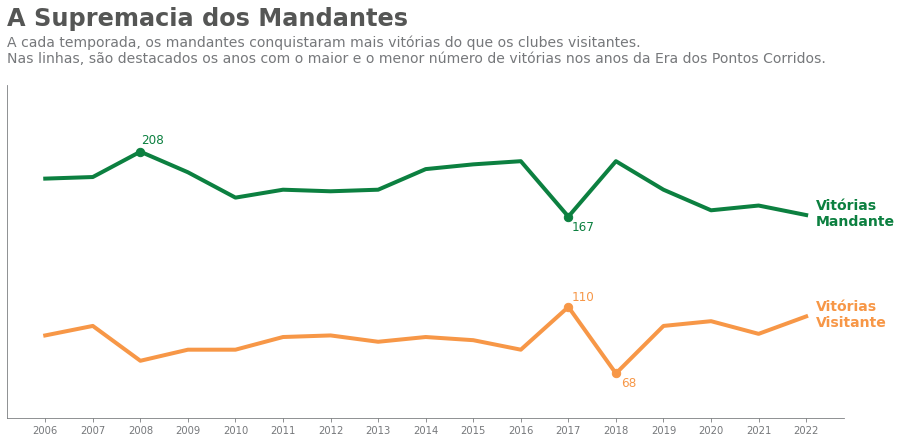

In [ ]:
#@title
# Plotar gráfico de linha
fig, ax = plt.subplots(figsize=(15, 6), dpi=72)

# Plotar gráfico de linhas a partir de 2006
ax.plot('vitorias_mandante', data=total_jogos[3:], color=VERDE1, linewidth=4)
ax.plot('vitorias_visitante', data=total_jogos[3:], color=LARANJA1, linewidth=4)

# Definir valores dos anos no eixo x
ax.set_xticks(total_jogos.index)

# Definir cores dos eixos
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5)

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plots dos scatter plots
ax.scatter(total_jogos.index[5:6], total_jogos.vitorias_mandante[5:6],
           s=70,
           color=VERDE1,
           clip_on=False)
ax.scatter(total_jogos.index[14:15], total_jogos.vitorias_mandante[14:15],
           s=70,
           color=VERDE1,
           clip_on=False)
ax.scatter(total_jogos.index[14:16], total_jogos.vitorias_visitante[14:16],
           s=70,
           color=LARANJA1,
           clip_on=False)

# Anotações nos pontos de scatter a partir do índice 14 e índice 6
for i, j in enumerate(total_jogos.vitorias_mandante[5:6]):
    ax.annotate(
        f'{j}',
        xy=(total_jogos.index[5:6][i], j),
        xytext=(12, 12),
        textcoords='offset points',
        color=VERDE1,
        fontsize=12,
        fontweight='medium',
        ha='center',
        va='center'
        )
for i, j in enumerate(total_jogos.vitorias_mandante[14:15]):
    ax.annotate(
        f'{j}',
        xy=(total_jogos.index[14:15][i], j),
        xytext=(15, -10),
        textcoords='offset points',
        color=VERDE1,
        fontsize=12,
        fontweight='medium',
        ha='center',
        va='center'
        )

for i, j in enumerate(total_jogos.vitorias_visitante[14:15]):
    ax.annotate(
        f'{j}',
        xy=(total_jogos.index[14], j),
        xytext=(15, 10),
        textcoords='offset points',
        color=LARANJA1,
        fontsize=12,
        fontweight='medium',
        ha='center',
        va='center'
      )
for i, j in enumerate(total_jogos.vitorias_visitante[15:16]):
    ax.annotate(
        f'{j}',
        xy=(total_jogos.index[15], j),
        xytext=(13, -9),
        textcoords='offset points',
        color=LARANJA1,
        fontsize=12,
        fontweight='medium',
        ha='center',
        va='center'
      )

# Legenda no final de cada linha
ax.annotate(
    "Vitórias\nMandante",
    xy=(total_jogos.index[-1], total_jogos['vitorias_mandante'].values[-1]),
    xytext=(10, -10),
    textcoords='offset points',
    color=VERDE1,
    fontsize=14,
    fontweight='semibold'
)

ax.annotate(
    "Vitórias\nVisitante",
    xy=(total_jogos.index[-1], total_jogos['vitorias_visitante'].values[-1]),
    xytext=(10, -10),
    textcoords='offset points',
    color=LARANJA1,
    fontsize=14,
    fontweight='semibold'
)

# Título
ax.text(0, 1.18,'A Supremacia dos Mandantes',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(0, 1.07,'A cada temporada, os mandantes conquistaram mais vitórias do '
                'que os clubes visitantes.\n'
                'Nas linhas, são destacados os anos com o maior e o menor '
                'número de vitórias nos anos da Era dos Pontos Corridos.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# mudar range do eixo y
ax.set_ylim(40, 250)

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Mostrar gráfico
plt.show()



In [ ]:
#@title Tabela 4 - Dados Relativos de Vitórias de Mandantes e Visitantes, em conjunto com Empates, ao Longo dos Anos
# Cópia da tabela total_jogos para aplicar porcentagem
porcentagem_jogos = total_jogos.copy()
for col in list(porcentagem_jogos.columns)[:]:
    porcentagem_jogos[col] = porcentagem_jogos[col] / porcentagem_jogos['total_jogos']

# Definir colunas que vão ser mostradas
porcentagem_jogos_formatado = porcentagem_jogos[["vitorias_mandante",
                                                 "vitorias_visitante",
                                                 "empates"]]
# Renomear as colunas
porcentagem_jogos_formatado.columns = ['Vitórias-Mandante', 'Vitórias-Visitante', 'Empates']

# Aplicar formatação
porcentagem_jogos_formatado.style.format({"Vitórias-Mandante": "{:.2%}",
                                "Vitórias-Visitante": "{:.2%}",
                                "Empates": "{:.2%}"})\
                 .background_gradient(cmap='Greens')

,Vitórias-Mandante,Vitórias-Visitante,Empates
Ano,,,
2003,53.80%,20.47%,25.72%
2004,52.17%,22.46%,25.36%
2005,50.87%,26.84%,22.29%
2006,50.26%,24.21%,25.53%
2007,50.53%,25.79%,23.68%
2008,54.74%,20.00%,25.26%
2009,51.32%,21.84%,26.84%
2010,47.11%,21.84%,31.05%
2011,48.42%,23.95%,27.63%


## **2. Análise de Gols**

Para essa análise, será utilizado o dataset denominado df_gols. **Nele há informações sobre o Campeonato Brasileiro na Era dos Pontos Corridos a partir de 2014.**

É composto por 7986 linhas, cada uma representando um gol realizado entre 2014 e 2022, e possui 8 colunas.

As variáveis `data` e `Ano` foram adquiridas do df_full e incorporadas por meio do método `merge`, com o intuito de enriquecer a análise e fornecer informações adicionais relevantes.

In [ ]:
df_gols = df_gols.merge(df_full[['partida_id', 'data', 'Ano']], on='partida_id', how='left')
df_gols

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol,data,Ano
0,4607,1,Fluminense,Fred,45,Penalty,2014-04-19,2014
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra,2014-04-19,2014
2,4607,1,Fluminense,Rafael Sóbis,31,NaN,2014-04-19,2014
3,4608,1,Internacional,Charles Aránguiz,6,NaN,2014-04-19,2014
4,4611,1,Sao Paulo,Antônio Carlos dos Santos Aguiar,13,NaN,2014-04-20,2014
...,...,...,...,...,...,...,...,...
7981,8019,38,Atletico-GO,Dudu,17,NaN,2022-11-13,2022
7982,8021,38,Cuiaba,Jonathan Cafú,44,NaN,2022-11-13,2022
7983,8024,38,Internacional,Alexandre Alemão,39,NaN,2022-11-13,2022
7984,8025,38,Sao Paulo,Marcos Guilherme,77,NaN,2022-11-13,2022


##### **Dicionário das Variáveis**
 - `partida_ID` - ID da partida;
 - `rodada` - Rodada da partida;
 - `clube` - Nome do clube;
 - `atleta` - Nome do atleta que fez o gol;
 - `minuto` - Minuto na partida em que o gol foi marcado;
 - `data` - Data que ocorreu a partida;
 - `tipo_de_gol` - Tipo de gol, como Pênalti ou Gol Contra;
 - `Ano` - Ano em que ocorreu a partida.

##### **Tipos das variáveis**

In [ ]:
df_gols.dtypes

partida_id              int64
rodata                  int64
clube                  object
atleta                 object
minuto                 object
tipo_de_gol            object
data           datetime64[ns]
Ano                     int64
dtype: object

##### **Porcentagem de valores ausentes no *dataset***
Pode-se notar que a variável `tipo_de_gol` possui quase 90% dos seus valores nulos.

Desse modo, foi optado por **não utilizar essa variável** para analisar os dados, devido à elevada taxa de valores ausentes.

As demais variáveis não possuem valores ausentes.



In [ ]:
df_gols.isnull().sum().sort_values(ascending=False) / df_gols.shape[0]

tipo_de_gol    0.878412
partida_id     0.000000
rodata         0.000000
clube          0.000000
atleta         0.000000
minuto         0.000000
data           0.000000
Ano            0.000000
dtype: float64

### **2.1 Análise de Gols por Temporada**


A média de gols por temporada entre 2014 e 2022 na Série A do Brasileirão foi de impressionantes 887 gols, o que corresponde a aproximadamente 23 gols por rodada e cerca de 2 gols por jogo.

A temporada de 2020 foi a que registrou o maior número de gols, enquanto que a edição de 2018 apresentou o menor registro.

In [ ]:
#@title
# Contar o número de gols por ano
gols_por_ano = df_gols['Ano'].value_counts().reset_index()
gols_por_ano.columns = ['Ano', 'Quantidade de Gols']

# Ordenar os dados por ano
gols_por_ano = gols_por_ano.sort_values('Ano')

In [ ]:
#@title
# Calcular a média dos gols de todas as temporadas
media_gols = gols_por_ano['Quantidade de Gols'].mean()
#print(f'A média de gols por temporada entre 2014 e 2022 foi de: {media_gols:.0f} gols')

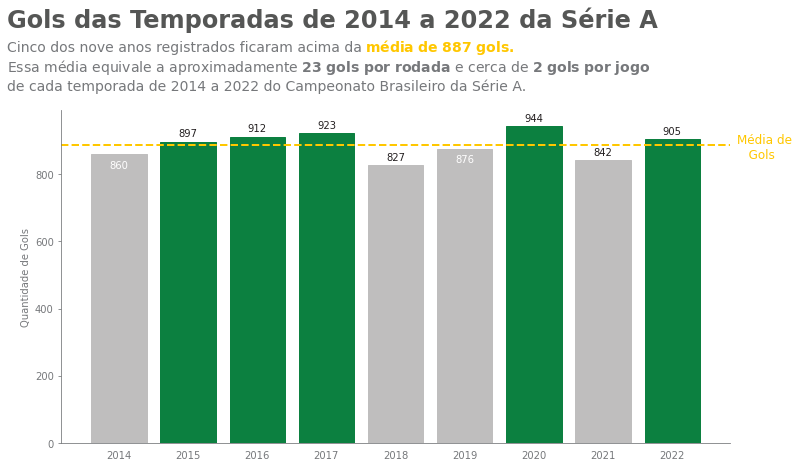

In [ ]:
#@title
# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(12, 6), dpi=72)

# Criar o gráfico de barras agrupado por ano
barras_ano = ax.bar(gols_por_ano['Ano'], gols_por_ano['Quantidade de Gols'])

# Definir cor diferente para as colunas abaixo da média
for i, rect in enumerate(barras_ano):
    height = rect.get_height()
    if height < media_gols:
        rect.set_color(CINZA9)
    else:
        rect.set_color(VERDE1)

    # Adicionar o rótulo de dados dentro das colunas
    if gols_por_ano['Ano'].iloc[i] in [2014, 2019]:
        ax.text(rect.get_x() + rect.get_width() / 2,
                height / 1.02,
                str(int(height)),
                ha='center',
                va='top',
                color=BRANCO)
    else:
      ax.text(rect.get_x() + rect.get_width() / 2,
              height * 1.01,
              str(int(height)),
                ha='center',
                va='bottom',
                color=CINZA1)

# Criar o gráfico de linhas para a média dos gols
ax.axhline(media_gols,
           color=AMARELO1,
           linestyle='--',
           linewidth=2,
           label='Média de Gols')

# Legenda para linha da média de gols
plt.text(1.01, 0.93,
         "Média de\n   Gols",
         verticalalignment="top",
         fontsize=12,
         color=AMARELO1,
         transform=ax.transAxes)

# Definir as legendas personalizadas no eixo X
ax.set_xticks(gols_por_ano['Ano'])

# Definir rótulo para eixo y
ax.set_ylabel('Quantidade de Gols', color=CINZA5)

# Definir cores dos eixos
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='both', colors=CINZA5)

# Remover grid
plt.grid(False)

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remover xticks do eixo x
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)

# Título
ax.text(-0.08, 1.25,'Gols das Temporadas de 2014 a 2022 da Série A',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.08, 1.06, 'Cinco dos nove anos registrados ficaram acima da\n'
                      'Essa média equivale a aproximadamente $\\bf 23 \ gols'
                      '\ por \ rodada $ e '
                      'cerca de $\\bf 2 \ gols \ por \ jogo $\nde cada temporada '
                      'de 2014 a 2022 do Campeonato '
                      'Brasileiro da Série A.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

ax.text(0.455, 1.176, '$\\bf média \ de \ 887 \ gols. $',
            color=AMARELO1,
            fontsize=14,
            transform=ax.transAxes)


# Exibir o gráfico
plt.show()

### **2.2 Análise de Gols por Clube**


Palmeiras, Atlético-MG e Flamengo, campeões das edições de 2022, 2021 e 2020, respectivamente, são os clubes que mais balançaram as redes entre 2014 e 2022.

Abaixo é representado o gráfico dos dez clubes que mais marcaram gols na Série A entre 2014 e 2022.

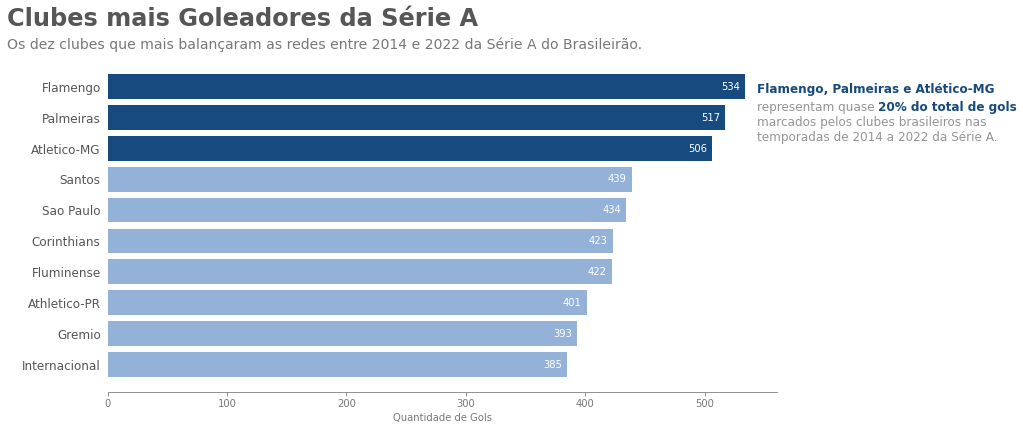

In [ ]:
#@title

# Definir 10 clubes com mais gols
gols_por_clube = df_gols['clube'].value_counts().reset_index()
gols_por_clube.columns = ['clube', 'gols']
gols_por_clube = gols_por_clube.head(10).sort_values(by='gols', ascending=True)

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(12, 6), dpi=72)

# Plotar o gráfico de barras horizontais
ax.barh(gols_por_clube['clube'], gols_por_clube['gols'], color=AZUL3)

# Definir cor AZUL1 para os 3 primeiros times
for i in range(7,10):
    ax.patches[i].set_facecolor(AZUL1)

# Configurar os rótulos e título do gráfico
ax.set_xlabel('Quantidade de Gols', color=CINZA5)



# Definir cores dos eixos
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Adicionar rótulos de dados
for rect in ax.patches:
    width = rect.get_width()
    ax.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                 xytext=(-5, 0),
                 textcoords='offset points',
                 ha='right',
                 va='center',
                 color=BRANCO)

# Título
ax.text(-0.15, 1.1,'Clubes mais Goleadores da Série A',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.15, 1.03, 'Os dez clubes que mais balançaram as redes'
                  ' entre 2014 e 2022 da Série A do Brasileirão.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Legenda
ax.text(0.97, 0.9, 'Flamengo, Palmeiras e Atlético-MG',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(0.97, 0.756, 'representam quase'
                    '\nmarcados pelos clubes brasileiros nas'
                    '\ntemporadas de 2014 a 2022 da Série A.',
        fontsize=12,
        color=CINZA7,
        transform=ax.transAxes)

ax.text(1.15, 0.845, '20% do total de gols',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

# Exibir o gráfico
plt.show()

### **2.3 Análise dos Maiores Artilheiros**

**Abaixo** é representado o gráfico dos dez jogadores que mais marcaram gols na Série A entre 2014 e 2022.

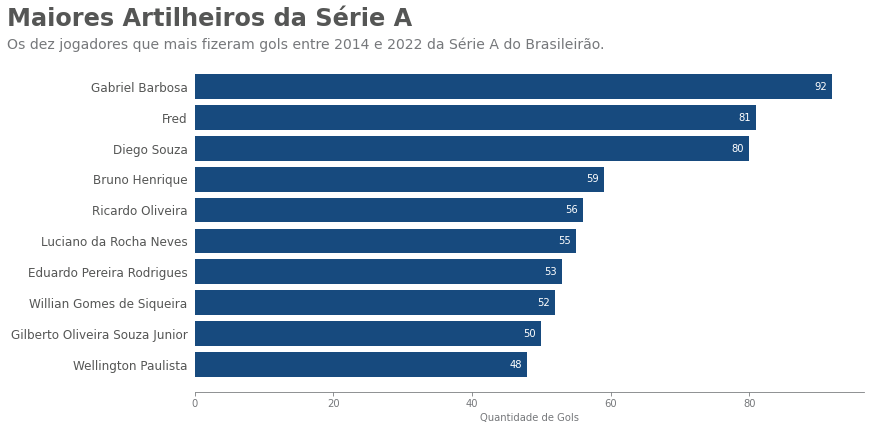

In [ ]:
#@title
# Definir 10 maiores artilheiros
maiores_artilheiros = df_gols['atleta'].value_counts().nlargest(10).sort_values(ascending=True).reset_index()
maiores_artilheiros.columns = ['Atleta', 'Gols']

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(12, 6), dpi=72)

# Plotar o gráfico de barras horizontais
ax.barh(maiores_artilheiros['Atleta'], maiores_artilheiros['Gols'], color=AZUL1)

# Configurar rótulos do eixo x
ax.set_xlabel('Quantidade de Gols', color=CINZA5)

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Adicionar rótulos de dados
for rect in ax.patches:
    width = rect.get_width()
    ax.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                 xytext=(-5, 0),
                 textcoords='offset points',
                 ha='right',
                 va='center',
                 color=BRANCO)

# Título
ax.text(-0.28, 1.1,'Maiores Artilheiros da Série A',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.28, 1.03, 'Os dez jogadores que mais fizeram gols'
                  ' entre 2014 e 2022 da Série A do Brasileirão.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Exibir o gráfico
plt.show()

### **2.4 Análise dos Gols por Período**

Ao analisar a quantidade de gols por tempo de jogo, observa-se que o segundo tempo apresentou um total de 4805 gols, enquanto o primeiro tempo registrou 3181 gols, indicando uma **maior propensão para os times marcarem na metade final da partida**. Esses dados revelam a dinâmica dos jogos ao longo do confronto, destacando a importância de se considerar o tempo de jogo para compreender as estatísticas e desempenho das equipes.

Ademais, é interessante destacar que os **acréscimos** têm sido palco de momentos decisivos, com uma porcentagem significativa de gols. Cerca de 11% dos gols do segundo tempo ocorreram durante os acréscimos, enquanto que aproximadamente 8% dos gols foram marcados nos minutos adicionais do primeiro tempo.

Desse modo, esses gols nos acréscimos mostram a importância de manter a concentração até o último segundo, visto que existe uma possibilidade considerável de ocorrerem gols que podem influenciar no resultado da partida.





In [ ]:
#@title
# Função para definir período do gol
def definir_periodo(minuto):
    if '+' in minuto:
        minuto = minuto.split('+')[0]
    if minuto <= '45': # Verificar os minutos como string, pois a coluna 'minuto' está como string devido aos acréscimos (ex.: 45+1 -> + não reconhece como int)
        return 'Primeiro Tempo'
    else:
        return 'Segundo Tempo'

# Aplicar a função definir_periodo à coluna 'Minuto'
df_gols['Periodo'] = df_gols['minuto'].apply(definir_periodo)

# Agrupar gols por período e calcular a quantidade de gols em cada período
gols_por_periodo = df_gols['Periodo'].value_counts().reset_index()
gols_por_periodo.columns = ['Periodo', 'Gols']

# Exibir o resultado
# display(gols_por_periodo)

In [ ]:
#@title
# Filtrar algum minuto para verificar quantidade de gols
# df_gols.loc[df_gols['minuto'] == '90+1']

In [ ]:
#@title
# Verificar minutos
# df_gols.minuto.unique()

# Lista de gols no acréscimo obtida a partir de df_gols.minuto.unique()
acrescimos_primeiro_tempo = ['45+1', '45+2', '45+3', '45+4', '45+5', '45+6',
                             '45+7', '45+8', '45+9', '45+10', '45+11', '45+13']
acrescimos_segundo_tempo = ['90+1', '90+2', '90+3', '90+4', '90+5', '90+6', '90+7',
                            '90+8', '90+9', '90+10', '90+11', '90+12', '90+13']

# Verificar quantidade de gols que ocorreram nos acréscimos
total_gols_acrescimos_pt = df_gols[df_gols['minuto'].isin(acrescimos_primeiro_tempo)].shape[0]
total_gols_acrescimos_st = df_gols[df_gols['minuto'].isin(acrescimos_segundo_tempo)].shape[0]

# Formar um df de gols nos acréscimos
total_gols_acrescimos = pd.DataFrame({'Periodo': ['Primeiro Tempo', 'Segundo Tempo'],
                                      'Gols Acrescimo': [total_gols_acrescimos_pt, total_gols_acrescimos_st]},
                                     index=['1', '0'])

# Calcular as porcentagens dos acréscimos em relação ao total de gols em cada período
porcentagem_acrescimos_st = (total_gols_acrescimos['Gols Acrescimo'][0] / gols_por_periodo['Gols'][1]) * 100
porcentagem_acrescimos_pt = (total_gols_acrescimos['Gols Acrescimo'][1] / gols_por_periodo['Gols'][0]) * 100

# Adicionar as porcentagens ao DataFrame total_gols_acrescimos
total_gols_acrescimos['Porcentagem Acrescimo'] = [porcentagem_acrescimos_st, porcentagem_acrescimos_pt]

# display(total_gols_acrescimos)

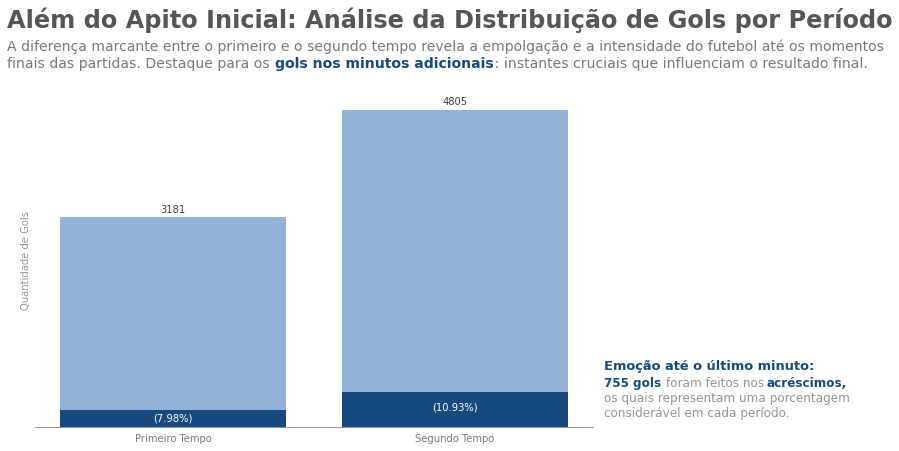

In [ ]:
#@title
# Inverter a ordem das barras
gols_por_periodo = gols_por_periodo.iloc[::-1]

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)

# Criar o gráfico de barras empilhadas
ax.bar(gols_por_periodo['Periodo'], gols_por_periodo['Gols'], color=AZUL3)
ax.bar(total_gols_acrescimos['Periodo'], total_gols_acrescimos['Gols Acrescimo'],
       color=AZUL1, label='Gols Acréscimos')

# Remover grid
ax.grid(False)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='both', colors=CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Gols', color=CINZA7)


# Definir cores dos eixos
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Remover xticks do eixo x
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

for i, rect in enumerate(ax.patches[len(gols_por_periodo):]):
    x = rect.get_x() + rect.get_width() / 2
    porcentagem = total_gols_acrescimos['Porcentagem Acrescimo'][i]
    if i == 0: # Ajustar rótulo dos acréscimos do 1º Tempo
        va = 'center'
        y = rect.get_height() / 1.2
    else: # Ajustar rótulo dos acréscimos do 2º Tempo
        va = 'center'
        y = rect.get_height() / 1.4
    ax.text(x, y, f'\n({porcentagem:.2f}%)',
            ha='center', va=va, color=BRANCO)

# Adicionar rótulos de dados para os períodos
for i, rect in enumerate(ax.patches[:len(gols_por_periodo)]):
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height() * 1.01
    ax.text(x, y, str(int(rect.get_height())),
            ha='center', va='bottom', color=CINZA2)

# Título
ax.text(-0.05, 1.2,'Além do Apito Inicial: Análise da Distribuição de Gols por Período',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.05, 1.08,  'A diferença marcante entre o primeiro e o segundo tempo revela '
                  'a empolgação e a intensidade do futebol até os momentos'
                  '\nfinais das partidas. '
                  'Destaque para os                                         '
                  '         : instantes '
                  'cruciais que influenciam o resultado final.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

ax.text(0.43, 1.079,  'gols nos minutos adicionais',
        fontsize=14,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

# Legenda
ax.text(1.02, 0.17, 'Emoção até o último minuto:',
        fontsize=13,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(1.02, 0.03, '                foram feitos nos'
                    '\nos quais representam uma porcentagem'
                    '\nconsiderável em cada período.',
        fontsize=12,
        color=CINZA7,
        transform=ax.transAxes)

ax.text(1.02, 0.119, '755 gols',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(1.31, 0.119, 'acréscimos,',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

# Exibir o gráfico
plt.show()


## **3. Análise de Cartões**

Para essa análise, será utilizado o dataset denominado df_cartoes. **Nele há informações sobre o Campeonato Brasileiro na Era dos Pontos Corridos a partir de 2014.**

É composto por 16739 linhas, cada uma representando a aplicação de cartão vermelho ou amarelo entre 2014 e 2022, e possui 10 colunas.

As variáveis `data` e `Ano` foram adquiridas do df_full e incorporadas por meio do método `merge`, com o intuito de enriquecer a análise e fornecer informações adicionais relevantes.

In [ ]:
#@title
df_cartoes = df_cartoes.merge(df_full[['partida_id', 'data', 'Ano']], on='partida_id', how='left')

In [ ]:
df_cartoes

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto,data,Ano
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66,2014-04-19,2014
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72,2014-04-19,2014
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86,2014-04-19,2014
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10,2014-04-19,2014
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44,2014-04-19,2014
...,...,...,...,...,...,...,...,...,...,...
16734,8023,38,Atletico-MG,Amarelo,Jemerson de Jesus Nascimento,34.0,Zagueiro,45+2,2022-11-13,2022
16735,8024,38,Internacional,Amarelo,Lucas Ramos,37.0,Meio-campo,80,2022-11-13,2022
16736,8024,38,Palmeiras,Amarelo,José Manuel Alberto López,18.0,Meio-campo,88,2022-11-13,2022
16737,8024,38,Palmeiras,Amarelo,Eduard Atuesta,20.0,Meio-campo,23,2022-11-13,2022


##### **Dicionário das Variáveis**
 - `partida_ID` - ID da partida;
 - `rodada` - Rodada da partida;
 - `clube` - Nome do clube;
 - `cartao` - Cor do cartão aplicado;
 - `atleta` - Nome do atleta que fez o gol;
 - `num_camisa` - Número da camisa do atleta;
 - `posicao` - Posição na partida em que o atleta se encontra;
 - `minuto` - Minuto na partida em que o gol foi marcado;
 - `data` - Data que ocorreu a partida;
 - `Ano` - Ano em que ocorreu a partida.

##### **Tipos das variáveis**

In [ ]:
df_cartoes.dtypes

partida_id             int64
rodata                 int64
clube                 object
cartao                object
atleta                object
num_camisa           float64
posicao               object
minuto                object
data          datetime64[ns]
Ano                    int64
dtype: object

##### **Porcentagem de valores ausentes no *dataset***
Pode-se notar que a variável `posicao` possui aproximadamente 7% dos seus valores nulos, enquanto que `num_camisa` possui cerca de 2%. Já a coluna `atleta` possui uma quantidade ínfima de valores nulos.

As demais variáveis não possuem valores ausentes.

In [ ]:
df_cartoes.isnull().sum().sort_values(ascending=False) / df_cartoes.shape[0]

posicao       0.071569
num_camisa    0.023060
atleta        0.000358
partida_id    0.000000
rodata        0.000000
clube         0.000000
cartao        0.000000
minuto        0.000000
data          0.000000
Ano           0.000000
dtype: float64

### **3.1 Análise de Cartões por Temporada**

Ao longo das temporadas de 2014 a 2022, os cartões desempenharam um papel relevante nas partidas da Série A do Brasileirão. **O total de cartões amarelos e vermelhos atingiu a marca de 16.739, sendo 15.889 cartões amarelos e 850 cartões vermelhos.**

Uma média de 1.860 cartões por temporada destaca a frequência dessas penalidades ao longo dos anos. A média de cartões amarelos por temporada foi de 1.765, enquanto que a média de cartões vermelhos foi de 94.

Entre os anos analisados, 2015, 2018 e 2022 se destacaram como os anos com o maior registro de cartões, indicando uma maior incidência de infrações e necessidade de advertências por parte dos árbitros. Na temporada de 2020, houve o terceiro maior registro de cartões vermelhos, todavia foi a terceira edição com menor quantidade de cartões amarelos.

Esses números evidenciam a importância da disciplina e do cumprimento das regras do jogo, ressaltando o papel dos cartões como instrumento de controle e punição durante as partidas do Brasileirão.

In [ ]:
#@title
# Contar o número de gols por ano
cartoes_por_ano = df_cartoes['Ano'].value_counts().reset_index()
cartoes_por_ano.columns = ['Ano', 'Quantidade de Cartões']

# Inicializar as colunas de quantidade de cartões vermelhos e amarelos
cartoes_por_ano['Cartoes Amarelos'] = 0
cartoes_por_ano['Cartoes Vermelhos'] = 0

# Percorrer as linhas do DataFrame
for i, linha in df_cartoes.iterrows():
    # Obter o ano e o tipo de cartão da linha atual
    ano = linha['Ano']
    cartao = linha['cartao']

    # Incrementar a contagem de acordo com o tipo de cartão
    if cartao == 'Vermelho':
        cartoes_por_ano.loc[cartoes_por_ano['Ano'] == ano, 'Cartoes Vermelhos'] += 1
    elif cartao == 'Amarelo':
        cartoes_por_ano.loc[cartoes_por_ano['Ano'] == ano, 'Cartoes Amarelos'] += 1

# Ordenar os dados por ano
cartoes_por_ano = cartoes_por_ano.sort_values('Ano')
#display(cartoes_por_ano)

In [ ]:
#@title
# Calcular a soma total de cartões amarelos e vermelhos em todas as temporadas
total_cartoes_amarelos = cartoes_por_ano['Cartoes Amarelos'].sum()
total_cartoes_vermelhos = cartoes_por_ano['Cartoes Vermelhos'].sum()

# Print dos resultados
# print(f'Total de Cartões Amarelos: {total_cartoes_amarelos} cartões')
# print(f'Total de Cartões Vermelhos: {total_cartoes_vermelhos} cartões')

In [ ]:
#@title
# Calcular a média dos gols de todas as temporadas
media_cartoes = cartoes_por_ano['Quantidade de Cartões'].mean()
media_cartoes_amarelos = cartoes_por_ano['Cartoes Amarelos'].mean()
media_cartoes_vermelhos = cartoes_por_ano['Cartoes Vermelhos'].mean()

# Print dos resultados
# print(f'A média de cartões por temporada entre 2014 e 2022 foi de: {media_cartoes:.0f} cartões.')
# print(f'A média de cartões amarelos por temporada entre 2014 e 2022 foi de: {media_cartoes_amarelos:.0f} cartões.')
# print(f'A média de cartões vermelhos por temporada entre 2014 e 2022 foi de: {media_cartoes_vermelhos:.0f} cartões.')

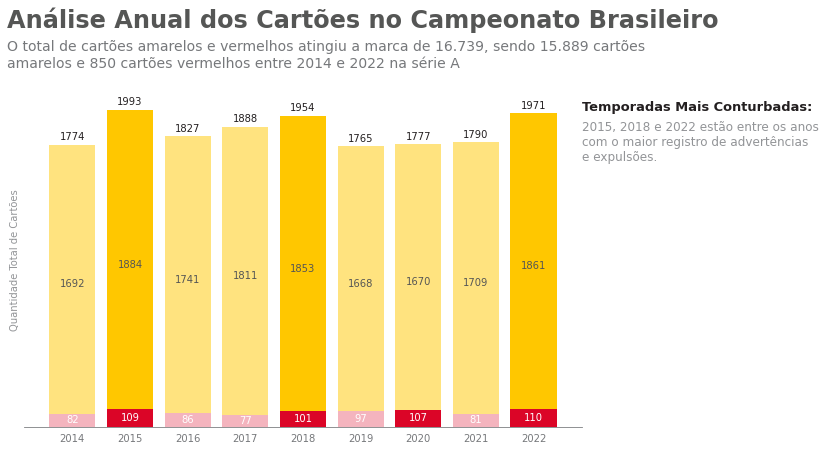

In [ ]:
#@title
# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)

# Definir as cores das barras
cv_cores = [VERMELHO4 if ano not in [2015, 2018, 2020, 2022] else VERMELHO1 for ano in cartoes_por_ano['Ano']]
ca_cores = [AMARELO4 if ano not in [2015, 2018, 2022] else AMARELO1 for ano in cartoes_por_ano['Ano']]

# Criar o gráfico de barras empilhadas por ano
barra_cv = ax.bar(cartoes_por_ano['Ano'], cartoes_por_ano['Cartoes Vermelhos'], label='Cartões Vermelhos', color=cv_cores)
barra_ca = ax.bar(cartoes_por_ano['Ano'], cartoes_por_ano['Cartoes Amarelos'], bottom=cartoes_por_ano['Cartoes Vermelhos'], label='Cartões Amarelos', color=ca_cores)

# Remover grid
ax.grid(False)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='both', colors=CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Gols', color=CINZA7)


# Definir cores dos eixos
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Remover xticks do eixo x
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Configurar rótulo do eixo y
ax.set_ylabel('Quantidade Total de Cartões')

# Definir as legendas personalizadas no eixo X
ax.set_xticks(cartoes_por_ano['Ano'])

# Adicionar rótulo de dados para as barras de cartões vermelhos
for i, cv in enumerate(cartoes_por_ano['Cartoes Vermelhos']):
    x = cartoes_por_ano['Ano'].iloc[i]
    y = cv / 2
    ax.text(x, y, str(int(cv)), ha='center', va='center', color=BRANCO)

# Adicionar rótulo de dados para as barras de cartões amarelos
for i, ca in enumerate(cartoes_por_ano['Cartoes Amarelos']):
    x = cartoes_por_ano['Ano'].iloc[i]
    y = cartoes_por_ano['Cartoes Vermelhos'].iloc[i] + ca / 2
    ax.text(x, y, str(int(ca)), ha='center', va='top', color=CINZA3)

# Adicionar rótulo de dados para as barras com total de cartões
for i, ca in enumerate(cartoes_por_ano['Quantidade de Cartões']):
    x = cartoes_por_ano['Ano'].iloc[i]
    y = cartoes_por_ano['Cartoes Vermelhos'].iloc[i] + cartoes_por_ano['Cartoes Amarelos'].iloc[i] * 1.01
    ax.text(x, y, str(int(ca)), ha='center', va='bottom', color=CINZA1)

# Título
ax.text(-0.03, 1.2,'Análise Anual dos Cartões no Campeonato Brasileiro',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.03, 1.08,  'O total de cartões amarelos e vermelhos atingiu a marca de '
                  '16.739, sendo 15.889 cartões '
                  '\namarelos e 850 cartões vermelhos entre 2014 e 2022 na série A',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Legenda
ax.text(1, 0.95, 'Temporadas Mais Conturbadas:',
        fontsize=13,
        color=CINZA1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(1, 0.8, '2015, 2018 e 2022 estão entre os anos\ncom o maior '
                    'registro de advertências\ne expulsões.',
        fontsize=12,
        color=CINZA7,
        transform=ax.transAxes)

# Exibir o gráfico
plt.show()


### **3.2 Análise de Cartões por Clubes**
Nessa análise, será explorada a média dos cartões amarelos e vermelhos entre os clubes, de modo a verificar as equipes mais disciplinadas e os clubes com advertências e expulsões.

Nessa análise, foi adotada a **média da quantidade de cartões aplicados por clube**, levando em consideração que **apenas oito clubes (de 37 equipes registradas no df_cartoes) participaram de todas as temporadas da Série A entre 2014 e 2022**. Essa abordagem visa evitar que a quantidade absoluta de cartões influencie o resultado, uma vez que os clubes com maior número de participações tenderiam a ocupar as primeiras posições.

In [ ]:
#@title
# Agrupar os dados pelo clube e contar o número de anos únicos
clubes_temporadas = df_cartoes.groupby('clube')['Ano'].nunique()

# Quantidade de clubes que jogaram entre 2014 e 2022 o campeonato brasileiro
clubes_temporadas_total = len(clubes_temporadas)
#print(f'Quantidade de clubes que jogaram entre 2014 e 2022: {clubes_temporadas_total} clubes')

# Quantidade de clubes que aparecem em todos os anos
clubes_todas_temporadas = len(clubes_temporadas[clubes_temporadas == 9])
#print(f'Clubes que jogaram todas as temporadas da Série A entre 2014 e 2022: {clubes_todas_temporadas} clubes')


In [ ]:
#@title
# Criar dicionários para armazenar a contagem de cartões vermelhos e amarelos por clube
contagem_cv = {}
contagem_ca = {}

# Percorrer cada linha do DataFrame
for i, linha in df_cartoes.iterrows():
    clube = linha['clube']
    cartao = linha['cartao']

    # Verificar se é cartão vermelho
    if cartao == 'Vermelho':
        if clube in contagem_cv:
            contagem_cv[clube] += 1
        else:
            contagem_cv[clube] = 1

    # Verificar se é cartão amarelo
    if cartao == 'Amarelo':
        if clube in contagem_ca:
            contagem_ca[clube] += 1
        else:
            contagem_ca[clube] = 1

#### **3.2.1 Análise de Cartões Amarelos por Clubes**

A análise dos cartões amarelos no futebol revela importantes padrões de comportamento das equipes ao longo das temporadas. O **cartão amarelo** é aplicado pelos árbitros como uma **advertência aos jogadores** por condutas antidesportivas, como faltas imprudentes, simulações e comportamentos inadequados.

Em primeiro lugar, nota-se que os **times que possuem uma média maior de cartões amarelos também tendem a ter uma média maior de cartões vermelhos**. Isso indica que essas equipes têm um estilo de jogo mais agressivo e propenso a faltas mais graves.

Além disso, constatou-se que a maioria das equipes com maior porcentagem de vitórias nos jogos disputados ao longo das temporadas estão mais abaixo no gráfico, com médias menores de cartões amarelos. Por outro lado, observou-se que os times com porcentagem maior de derrotas do que de vitórias estão nas primeiras colocações em termos de aplicações de cartões amarelos, com exceção do Internacional.

Isso indica que os **clubes com melhor desempenho tendem a adotar uma postura mais disciplinada**, evitando cometer infrações que resultem em advertências.

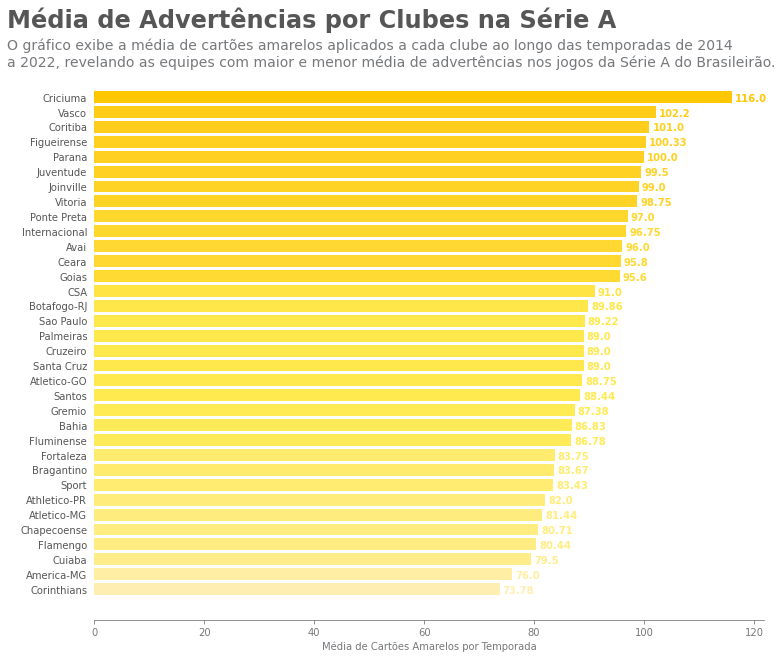

In [ ]:
#@title
# Calcular a média de cartões por temporada para cada clube
media_ca = {clube: float(round(contagem_ca[clube] / clubes_temporadas[clube], 2)) for clube in contagem_ca}
# Ordenar os clubes com base na média de cartões amarelos por temporada
clubes_ca = sorted(media_ca.items(), key=lambda x: x[1], reverse=True)

# Extrair os nomes dos clubes e as médias de cartões vermelhos
nomes_clubes = [clube[0] for clube in clubes_ca]
medias_ca = [clube[1] for clube in clubes_ca]

# Ordem das cores
cores = [AMARELO5, AMARELO3, AMARELO2, AMARELO1]

# Criar o mapa de cores com base nas cores definidas
cmap = LinearSegmentedColormap.from_list('custom_cmap', cores)

'''Normalizar as médias de cartões vermelhos para o intervalo [0, 1]:
(média do clube - menor valor das médias) / (maior valor das médias - menor valor das médias)'''
medias_norm = (medias_ca - np.min(medias_ca)) / (np.max(medias_ca) - np.min(medias_ca))
'''Foi necessário realizar uma normalização dos valores, isto é, converter a média dos
  cartões vermelhos em uma escala de 0 a 1 para aplicar o cmap.
'''

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(12, 10), dpi=72)

# Plotar as barras horizontais com o degradê de cores
ax.barh(nomes_clubes, medias_ca, color=cmap(medias_norm))

# Configurar rótulo do eixo x
ax.set_xlabel('Média de Cartões Amarelos por Temporada', color=CINZA5)

# Inverter a ordem dos clubes no eixo y
ax.invert_yaxis()

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=10)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Adicionar rótulos de dados
for rect, norm in zip(ax.patches, medias_norm): # Zip vai iterar em paralelo sobre patches (barras) e valores normalizados
    width = rect.get_width()
    color = cmap(norm)  # Obtém a cor do cmap com base na normalização
    ax.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                xytext=(3, -1),
                textcoords='offset points',
                ha='left',
                va='center',
                fontweight='bold',
                fontsize=10,
                color=color)  # Aplica a cor obtida do cmap

# Título
ax.text(-0.13, 1.07, 'Média de Advertências por Clubes na Série A',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.13, 1, 'O gráfico exibe a média de cartões amarelos aplicados '
                      'a cada clube ao longo das temporadas de 2014\na 2022, '
                      'revelando as equipes com maior e menor média de advertências nos '
                      'jogos da Série A do Brasileirão.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Mostrar o gráfico
plt.show()


#### **3.2.2 Análise de Cartões Vermelhos por Clubes**

O **cartão vermelho** no futebol é usado como uma **punição severa** aos jogadores por condutas graves, como agressões, faltas violentas e comportamentos antidesportivos. Sua aplicação resulta na **expulsão imediata do jogador**, deixando sua equipe em desvantagem numérica. O objetivo é manter a integridade do jogo, promovendo um ambiente de competição justo e seguro.

Nesse sentido, como retratado anteriormente, observa-se uma relação entre as médias de cartões amarelos e vermelhos das equipes. Isto é, os clubes que possuem uma média maior de cartões amarelos também tendem a ter uma média maior de cartões vermelhos. Isso indica que essas equipes adotam um estilo de jogo mais agressivo e propenso a infrações mais graves.

Além disso, destaca-se novamente que a maioria dos times com maior porcentagem de vitórias nos jogos disputados ao longo das temporadas apresentam médias menores de cartões vermelhos. Por outro lado, nota-se também que as equipes com maior porcentagem de derrotas estão nas primeiras colocações em termos de aplicações de cartões vermelhos, com exceção do Internacional.

Esses dados sugerem que os **clubes com melhor desempenho procuram evitar condutas que levem à expulsão de jogadores**, adotando uma postura mais disciplinada e focada no jogo. Já os times com menor sucesso tendem a se envolver em situações mais turbulentas, resultando em um maior número de cartões vermelhos.

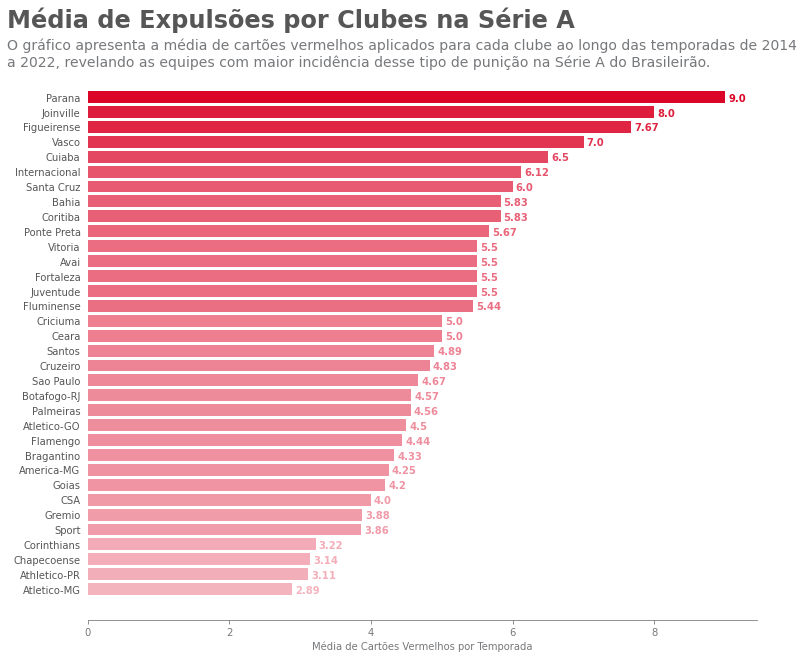

In [ ]:
#@title
# Calcular a média de cartões por temporada para cada clube
media_cv = {clube: float(round(contagem_cv[clube] / clubes_temporadas[clube], 2)) for clube in contagem_cv}

# Ordenar os clubes com base na média de cartões vermelhos por temporada
clubes_cv = sorted(media_cv.items(), key=lambda x: x[1], reverse=True)

# Extrair os nomes dos clubes e as médias de cartões vermelhos
nomes_clubes = [clube[0] for clube in clubes_cv]
medias_cv = [clube[1] for clube in clubes_cv]

# Ordem das cores
cores = [VERMELHO4, VERMELHO3, VERMELHO2, VERMELHO1]

# Criar o mapa de cores com base nas cores definidas
cmap = LinearSegmentedColormap.from_list('custom_cmap', cores)

'''Normalizar as médias de cartões vermelhos para o intervalo [0, 1]:
(média do clube - menor valor das médias) / (maior valor das médias - menor valor das médias)'''
medias_norm = (medias_cv - np.min(medias_cv)) / (np.max(medias_cv) - np.min(medias_cv))
'''Foi necessário realizar uma normalização dos valores, isto é, converter a média dos
  cartões vermelhos em uma escala de 0 a 1 para aplicar o cmap.
'''

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(12, 10), dpi=72)

# Plotar as barras horizontais com o degradê de cores
ax.barh(nomes_clubes, medias_cv, color=cmap(medias_norm))

# Configurar rótulo do eixo x
ax.set_xlabel('Média de Cartões Vermelhos por Temporada', color=CINZA5)

# Inverter a ordem dos clubes no eixo y
ax.invert_yaxis()

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=10)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Adicionar rótulos de dados
for rect, norm in zip(ax.patches, medias_norm): # Zip vai iterar em paralelo sobre patches (barras) e valores normalizados
    width = rect.get_width()
    color = cmap(norm)  # Obtém a cor do cmap com base na normalização
    ax.annotate(f'{width}', xy=(rect.get_x() + rect.get_width(),
                                 rect.get_y() + rect.get_height() / 2),
                xytext=(3, -1),
                textcoords='offset points',
                ha='left',
                va='center',
                fontweight='bold',
                fontsize=10,
                color=color)  # Aplica a cor obtida do cmap

# Título
ax.text(-0.12, 1.07, 'Média de Expulsões por Clubes na Série A',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.12, 1, 'O gráfico apresenta a média de cartões vermelhos aplicados '
                      'para cada clube ao longo das temporadas de 2014\na 2022, '
                      'revelando as equipes com maior incidência desse tipo '
                      'de punição na Série A do Brasileirão.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Mostrar o gráfico
plt.show()


### **3.3 Análise dos Cartões por Período**

Ao analisar as temporadas de 2014 a 2022 da Primeira Divisão do Campeonato Brasileiro, notou-se uma diferença significativa na distribuição dos cartões ao longo dos tempos das partidas. Comparando os dois períodos da partida de futebol, constata-se que a segunda parcial apresenta uma quantidade maior de cartões.

Enquanto o primeiro tempo registrou um total de 5.635 cartões (145 vermelhos e 5.490 amarelos), o segundo tempo acumulou 11.104 cartões (705 vermelhos e 10.399 amarelos). Isto é, há praticamente o **dobro de cartões amarelos em comparação com o primeiro tempo** e há **quase cinco vezes mais cartões vermelhos registrados no período final do jogo**.

Essa diferença demonstra que, conforme o jogo avança, aumenta a probabilidade de ocorrência de infrações que resultam em advertências por parte dos árbitros. É importante ressaltar que esses números são uma análise geral e podem variar de acordo com as características de cada partida.

In [ ]:
#@title
# Função para definir período do gol
def definir_periodo(minuto):
    if '+' in minuto:
        minuto = minuto.split('+')[0] # Considerar apenas primeiro número (ex.: 45+1 -> divide em 45 + 1 e só considera valor 45)
    if minuto <= '45': # Verificar os minutos como string, pois a coluna 'minuto' está como string devido aos acréscimos (ex.: 45+1 -> + não reconhece como int)
        return 'Primeiro Tempo'
    else:
        return 'Segundo Tempo'

# Aplicar a função definir_periodo à coluna 'Minuto'
df_cartoes['Periodo'] = df_cartoes['minuto'].apply(definir_periodo)

# Agrupar gols por período e calcular a quantidade de gols em cada período
cartoes_por_periodo = df_cartoes['Periodo'].value_counts().reset_index()
cartoes_por_periodo.columns = ['Periodo', 'Cartões']

# Exibir o resultado
#display(cartoes_por_periodo)

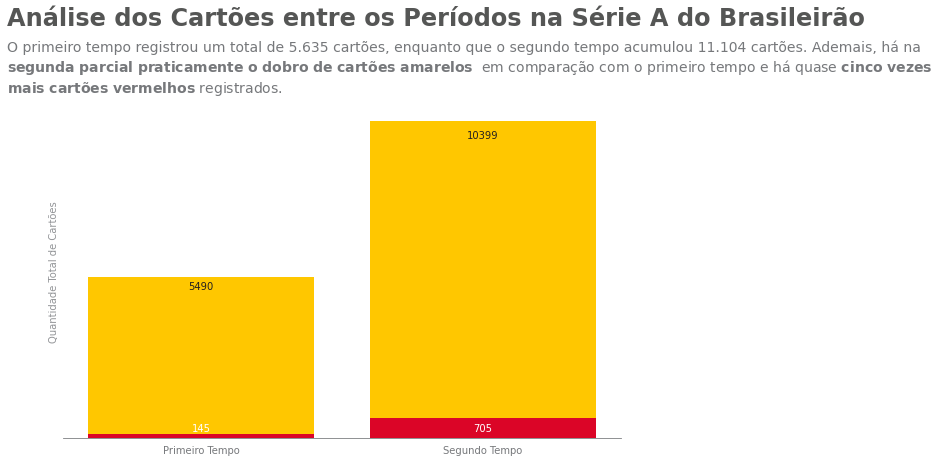

In [ ]:
#@title
# Agrupar os dados e desagrupar as colunas
cartoes_por_periodo = df_cartoes.groupby('Periodo')['cartao'].value_counts().unstack().reset_index()

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)

# Criar o gráfico de colunas empilhadas
barra_cv = ax.bar(cartoes_por_periodo['Periodo'], cartoes_por_periodo['Vermelho'], label='Vermelho', color=VERMELHO1)
barra_ca = ax.bar(cartoes_por_periodo['Periodo'], cartoes_por_periodo['Amarelo'], bottom=cartoes_por_periodo['Vermelho'], label='Amarelo', color=AMARELO1)

# Remover grid
ax.grid(False)

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='both', colors=CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Gols', color=CINZA7)

# Definir cores dos eixos
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Definir cores dos eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(CINZA5)

# Remover xticks do eixo x
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)

# remover yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

# Adicionar rótulos de dados para as barras de cartões vermelhos
for i, rect in enumerate(barra_cv):
    x = rect.get_x() + rect.get_width() / 2
    if i == 0:
        y = rect.get_height() + 5
        va = 'bottom'
        color = BRANCO
    else:
        y = rect.get_height() / 2
        va = 'center'
        color = BRANCO
    ax.text(x, y, str(int(cartoes_por_periodo['Vermelho'].iloc[i])),
            ha='center', va=va, color=color)


# Adicionar rótulos de dados para as barras de cartões amarelos
for i, rect in enumerate(barra_ca):
    x = rect.get_x() + rect.get_width() / 2
    y = cartoes_por_periodo['Vermelho'].iloc[i] + rect.get_height() / 1.03
    ax.text(x, y, str(int(cartoes_por_periodo['Amarelo'].iloc[i])),
            ha='center', va='top', color=CINZA1)

# Configurar legenda para eixo y
ax.set_ylabel('Quantidade Total de Cartões')

# Título
ax.text(-0.1, 1.24,'Análise dos Cartões entre os Períodos na Série A do Brasileirão',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.1, 1.04,  'O primeiro tempo registrou um total de 5.635 cartões, '
                      'enquanto que o segundo tempo acumulou 11.104 cartões. '
                      'Ademais, há na\n$\\bf segunda \ parcial \ praticamente \ o \ dobro $ '
                      '$\\bf de \ cartões \ amarelos $  em comparação com o primeiro tempo e '
                      'há quase $\\bf cinco \ vezes$\n$\\bf mais \ cartões \ vermelhos $ registrados.',
        fontsize=14,
        color=CINZA5,
        transform=ax.transAxes)

# Exibir o gráfico
plt.show()

---
## **Conclusões**
Neste projeto de Análise de Dados da Era dos Pontos Corridos da Série A do Brasileirão, foram explorados diferentes aspectos do futebol brasileiro. Abaixo segue um resumo de pontos relevantes encontrados nos datasets:

#### **1. Análise de Pontos e Desempenho dos Clubes**
 - São Paulo é o clube que mais conquistou pontos na Era dos Pontos Corridos, além de ser o time com maior porcentagem de vitórias;
 - Atlético-MG, Corinthians, Flamengo e Palmeiras são clubes que estão entre as equipes com mais empates como visitantes e também estão nas primeiras colocações dos times com maior porcentagem de vitórias como mandantes e visitantes em seus jogos disputados na Série A. Isso revela a eficiência desses clubes no campeonato brasileiro.
 - Apenas **12 clubes** apresentam uma **porcentagem de vitórias superior à de derrotas** em relação à quantidade de jogos que cada time disputou em suas participações na Era dos Pontos Corridos;
 - Cerca de **90% dos clubes** possuem **mais vitórias do que derrotas como mandantes**;
 - Entre os 10 primeiros clubes mais vitoriosos como mandante ou como visitante, apenas os times do Sul (Athlético-PR, Grêmio e Internacional) não foram campeões do Brasileirão Série A durante a Era dos Pontos Corridos;
 - **Com exceção de 2017, os anos de pandemia e pós-pandemia apresentaram os percentuais mais baixos de vitórias dos clubes que jogaram em casa**.

#### **2. Análise de Gols**
 - A média de gols por temporada entre 2014 e 2022 na Série A do Brasileirão foi de 887 gols, o que corresponde a aproximadamente 23 gols por rodada e cerca de 2 gols por jogo.
 - Entre 2014 e 2022, foi registrado no segundo tempo um total de 4805 gols, enquanto o primeiro tempo apresentou 3181 gols;
 - Foram feitos **755 gols nos acréscimos**, o que representa aproximadamente 10% dos gols registrados no período de 2014 a 2022. Ademais, cerca de **11% dos gols do segundo tempo ocorreram durante os acréscimos**, enquanto que aproximadamente **8% dos gols foram marcados nos minutos adicionais do primeiro tempo**.

#### **3. Análise de Cartões**
 - O total de cartões amarelos e vermelhos atingiu a marca de 16.739 entre 2014 e 2022, sendo 15.889 cartões amarelos e 850 cartões vermelhos;
 - Times que possuem uma média maior de cartões amarelos também apresentaram uma média maior de cartões vermelhos;
 - Equipes com maior porcentagem de derrotas estão nas primeiras colocações em termos de aplicações de cartões amarelos e vermelhos, com exceção do Internacional.

#### **Considerações Finais**
 - Com base nos dados, nota-se que jogar em casa é mais favorável do que jogar fora. Isso mostra a relevância de ser mandante em uma partida e indica que o fator de jogar em casa pode influenciar positivamente o desempenho das equipes;
 - O desempenho como mandante e visitante exerce um papel importante no sucesso dos clubes. Os times que conseguem obter vitórias consistentes em ambos os cenários têm mais chances de alcançar um bom desempenho geral no campeonato;
 - O maior número de cartões no segundo tempo, sobretudo os vermelhos, os quais resultam na expulsão imediata do jogador, deixando a equipe em desvantagem numérica, podem ter influenciado no número maior de gols registrados nessa parcial da partida;
 - Clubes com melhor desempenho procuram evitar condutas que levem à expulsão de jogadores, adotando uma postura mais disciplinada e focada no jogo.

Para projetos futuros de análise de dados do Brasileirão, há diversas possibilidades de aprimoramento. Isso inclui a inserção de análises estatísticas mais avançadas, como regressão e modelos de previsão, além da exploração de outras variáveis relevantes, como posse de bola e chutes a gol, e a investigação de padrões de desempenho ao longo das temporadas. Essas melhorias proporcionarão uma compreensão mais abrangente e detalhada do futebol brasileiro.

Por fim, é importante ressaltar que a análise de dados é uma ferramenta complementar e que o futebol também envolve fatores intangíveis e imprevisíveis. Afinal, o '**futebol é uma caixinha de surpresas**'.

## Bônus - Bar Chart Race


Abaixo há um exemplo de "Bar Chart Race" que acompanha a evolução dos clubes com base na pontuação de uma temporada específica. No momento, o gráfico exibe a temporada de 2022, mas é possível alterar para outras edições no campo "ano_escolhido".

Para efetuar a troca do ano, é necessário apertar 'Ctrl + F9' para executar todas as células do notebook. Após isso, o gráfico 'Bar Chart Race' aparecerá entre 2 a 3 minutos.

Quero aprimorar posteriormente esse gráfico, de modo que apareça todas as temporadas, bem como as rodadas e informções adicionais.

In [ ]:
# Filtrar para um ano específico
ano_escolhido = 2022
df_filtrado_ano = df_full[df_full['Ano'] == ano_escolhido]

In [ ]:
#@title
# Criar uma 'pivot table' com a soma dos pontos mandantes
pivot_mandante = df_filtrado_ano.pivot_table(index='data', columns='mandante', values='pontos_mandante', aggfunc='sum')

# Preencher valores ausentes com 0
pivot_mandante = pivot_mandante.fillna(0)

# Calcular a soma acumulada dos pontos mandantes
pivot_mandante_cumsum = pivot_mandante.cumsum()

# Criar uma pivot table com a soma dos pontos visitantes
pivot_visitante = df_filtrado_ano.pivot_table(index='data', columns='visitante', values='pontos_visitante', aggfunc='sum')

# Preencher valores ausentes com 0
pivot_visitante = pivot_visitante.fillna(0)

# Calcular a soma acumulada dos pontos visitantes
pivot_visitante_cumsum = pivot_visitante.cumsum()

# Combinar as pivot tables em uma única tabela
total_pontos_cumsum = pivot_mandante_cumsum + pivot_visitante_cumsum

# Exibir a tabela de soma acumulada dos pontos
# display(total_pontos_cumsum)

bcr.bar_chart_race(df=total_pontos_cumsum, filename=None)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
